In [1]:
import pymn
import pandas as pd
import matplotlib.pyplot as plt
import scanpy as sc
import anndata as ad
import numpy as np

/home/passala/miniconda3/envs/py39/lib/python3.9/site-packages/pyMetaNeighbor-0.1.0-py3.9.egg/pymn/trainModel.py:29: SyntaxWarning: "is not" with a literal. Did you mean "!="?
/home/passala/miniconda3/envs/py39/lib/python3.9/site-packages/pyMetaNeighbor-0.1.0-py3.9.egg/pymn/trainModel.py:29: SyntaxWarning: "is not" with a literal. Did you mean "!="?


In [2]:
def get_go_annotations_as_panda(species):
    import pandas as pd
    ## TAXA_ID to species_name 
    if type(species) == int:
        mapper = pd.read_csv('/home/passala/Gene_duplication_project/Generated_tables/Time_Savers/Species_name_resolver.csv')
        species = mapper['Common Name'].loc[mapper['Taxa ID'] == species].item()

    ## Get file_location 
    file_location = '/data/CoCoCoNet/gene2go/' + species + '_gene2go.csv'
    original_csv = pd.read_csv(file_location,sep = ' ')
    if len(original_csv) == 0:
        raise NameError('No Annotations for this Species :(')
    original_csv = original_csv.dropna()
    original_csv['Present'] = 1 
    matrixed_version = original_csv.pivot(index = 'NetworkIDs',columns = 'GO_term',values = 'Present')
    filled_matrixed_version = matrixed_version.fillna(value = 0)
    return filled_matrixed_version

In [3]:
sorghum_norm_data = sc.read_csv('/data/passala/Collaborator_Data/Bruno_Ken_Collab/Sorghum_NormalizedData.csv')
sorghum_norm_data = sorghum_norm_data.T
sorghum_norm_data

maize_norm_data = sc.read_csv('/data/passala/Collaborator_Data/Bruno_Ken_Collab/Maize_NormalizedData.csv')
maize_norm_data = maize_norm_data.T
maize_norm_data
millet_norm_data = sc.read_csv('/data/passala/Collaborator_Data/Bruno_Ken_Collab/Setaria_NormalizedData.csv')
millet_norm_data = millet_norm_data.T
millet_norm_data

AnnData object with n_obs × n_vars = 989 × 52334

In [4]:
sorghum_mapped_genes = sorghum_norm_data.var_names[sorghum_norm_data.var_names.str.startswith(pat = 'Zm')]
millet_mapped_genes = millet_norm_data.var_names[millet_norm_data.var_names.str.startswith(pat = 'Zm')]
maize_all_genes = maize_norm_data.var_names
sorghum_and_millet_mapped_genes = sorghum_mapped_genes.intersection(other = millet_mapped_genes)
maize_sorghum_millet_overlap = sorghum_and_millet_mapped_genes.intersection(other = maize_all_genes)
maize_sorghum_millet_overlap

Index(['Zm00001d027230', 'Zm00001d027231', 'Zm00001d027236', 'Zm00001d027239',
       'Zm00001d027240', 'Zm00001d027242', 'Zm00001d027250', 'Zm00001d027256',
       'Zm00001d027257', 'Zm00001d027258',
       ...
       'Zm00001d052616', 'Zm00001d052963', 'Zm00001d033139',
       'Zm00001d032506.1', 'Zm00001d013907', 'Zm00001d030323',
       'Zm00001d029888', 'Zm00001d029222', 'Zm00001d047567', 'Zm00001d027890'],
      dtype='object', length=29243)

In [5]:
sorghum_subset = sorghum_norm_data[:,maize_sorghum_millet_overlap]
maize_subset = maize_norm_data[:,maize_sorghum_millet_overlap]
millet_subset = millet_norm_data[:,maize_sorghum_millet_overlap]


In [6]:
maize_subset

View of AnnData object with n_obs × n_vars = 7615 × 29243

In [7]:
identity_of_millet_cells = pd.read_csv('/data/passala/Collaborator_Data/Bruno_Ken_Collab/Setaria_Cell_Identity.csv',index_col = 0)
identity_of_maize_cells = pd.read_csv('/data/passala/Collaborator_Data/Bruno_Ken_Collab/Maize_Cell_Identity.csv',index_col = 0)
identity_of_sorghum_cells = pd.read_csv('/data/passala/Collaborator_Data/Bruno_Ken_Collab/Sorghum_Cell_Identity.csv',index_col = 0)
identity_of_sorghum_cells

,orig.ident,nCount_RNA,nFeature_RNA,nCount_SCT,nFeature_SCT,integrated_snn_res.0.6,seurat_clusters,orig.ident2,orig.ident3,Annotation,orig.ident4,orig.ident5,orig.ident6
Sorghum_Cell_GTGAGCCCACAGGATG,Sorgh_Cells,3568,1762,8888,2098,1,1,Sorgh_Cells,Cell,Cortex_1,Sorgh,Cell,Sorgh_Cells_Cortex_1
Sorghum_Cell_AAACGCTGTTGTGTTG,Sorgh_Cells,4796,1788,8920,1989,1,1,Sorgh_Cells,Cell,Cortex_1,Sorgh,Cell,Sorgh_Cells_Cortex_1
Sorghum_Cell_AAACGCTTCATGAGAA,Sorgh_Cells,8062,2619,9112,2619,1,1,Sorgh_Cells,Cell,Cortex_1,Sorgh,Cell,Sorgh_Cells_Cortex_1
Sorghum_Cell_AACAAAGCATTCTCTA,Sorgh_Cells,6703,2157,9045,2158,1,1,Sorgh_Cells,Cell,Cortex_1,Sorgh,Cell,Sorgh_Cells_Cortex_1
Sorghum_Cell_AACCAACTCTTAGTTC,Sorgh_Cells,4382,1765,8980,1986,1,1,Sorgh_Cells,Cell,Cortex_1,Sorgh,Cell,Sorgh_Cells_Cortex_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Sorghum_Nucl2_AGGTTACTCTTAAGGC,Sorgh_Nucl2,1847,1295,1845,1293,11,11,Sorgh_Nucl,Nucl,Initials,Sorgh,Nucl,Sorgh_Nucl_Initials
Sorghum_Nucl2_CCGTTCAAGGTCGTCC,Sorgh_Nucl2,1403,1070,1550,1068,11,11,Sorgh_Nucl,Nucl,Initials,Sorgh,Nucl,Sorgh_Nucl_Initials
Sorghum_Nucl2_GATGACTGTTCCAGGC,Sorgh_Nucl2,2044,1415,2029,1413,11,11,Sorgh_Nucl,Nucl,Initials,Sorgh,Nucl,Sorgh_Nucl_Initials
Sorghum_Nucl2_TCAATCTTCCGAACGC,Sorgh_Nucl2,1906,1284,1905,1283,11,11,Sorgh_Nucl,Nucl,Initials,Sorgh,Nucl,Sorgh_Nucl_Initials


In [8]:
millet_subset.obs['Cell Cluster Annotation'] = identity_of_millet_cells['Annotation']
millet_subset.obs['Species'] = 'Millet'
maize_subset.obs['Cell Cluster Annotation'] = identity_of_maize_cells['Annotation']
maize_subset.obs['Species'] = 'Maize'
sorghum_subset.obs['Cell Cluster Annotation'] = identity_of_sorghum_cells['Annotation']
sorghum_subset.obs['Species'] = 'Sorghum'


Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.


In [9]:
#sorghum_and_maize = ad.concat([sorghum_subset,maize_subset])
species_all_merged = ad.concat([sorghum_subset,maize_subset,millet_subset])


In [10]:
species_all_merged.var

""
Zm00001d027230
Zm00001d027231
Zm00001d027236
Zm00001d027239
Zm00001d027240
...
Zm00001d030323
Zm00001d029888
Zm00001d029222
Zm00001d047567


In [11]:
species_all_merged.obs['Cluster and Type'] = species_all_merged.obs['Cell Cluster Annotation']
species_all_merged.obs['Cluster and Type'].loc[species_all_merged.obs_names.str.contains('Nucl')] = species_all_merged.obs['Cluster and Type'] + ' Nucl'
species_all_merged.obs['Cluster and Type'].loc[species_all_merged.obs_names.str.contains('Cell')] = species_all_merged.obs['Cluster and Type'] + ' Cell'
species_all_merged.obs

,Cell Cluster Annotation,Species,Cluster and Type
Sorghum_Cell_GTGAGCCCACAGGATG,Cortex_1,Sorghum,Cortex_1 Cell
Sorghum_Cell_AAACGCTGTTGTGTTG,Cortex_1,Sorghum,Cortex_1 Cell
Sorghum_Cell_AAACGCTTCATGAGAA,Cortex_1,Sorghum,Cortex_1 Cell
Sorghum_Cell_AACAAAGCATTCTCTA,Cortex_1,Sorghum,Cortex_1 Cell
Sorghum_Cell_AACCAACTCTTAGTTC,Cortex_1,Sorghum,Cortex_1 Cell
...,...,...,...
Set_Cell_TTGCGTCCAGCCTGTG,Cortex_2,Millet,Cortex_2 Cell
Set_Cell_TTTACTGGTCGCGAAA,Cortex_2,Millet,Cortex_2 Cell
Set_Cell_TTTCCTCAGGCCGAAT,Cortex_2,Millet,Cortex_2 Cell
Set_Cell_TTTCCTCTCGCCGTGA,Cortex_2,Millet,Cortex_2 Cell


In [12]:
species_all_merged.obs['Cluster and Species'] = species_all_merged.obs['Cell Cluster Annotation']
species_all_merged.obs['Cluster and Species'].loc[species_all_merged.obs['Species'].str.contains('Maize')] = species_all_merged.obs['Cluster and Type'] + ' Maize'
species_all_merged.obs['Cluster and Species'].loc[species_all_merged.obs['Species'].str.contains('Millet')] = species_all_merged.obs['Cluster and Type'] + ' Millet'
species_all_merged.obs['Cluster and Species'].loc[species_all_merged.obs['Species'].str.contains('Sorghum')] = species_all_merged.obs['Cluster and Type'] + ' Sorghum'
species_all_merged.obs

,Cell Cluster Annotation,Species,Cluster and Type,Cluster and Species
Sorghum_Cell_GTGAGCCCACAGGATG,Cortex_1,Sorghum,Cortex_1 Cell,Cortex_1 Cell Sorghum
Sorghum_Cell_AAACGCTGTTGTGTTG,Cortex_1,Sorghum,Cortex_1 Cell,Cortex_1 Cell Sorghum
Sorghum_Cell_AAACGCTTCATGAGAA,Cortex_1,Sorghum,Cortex_1 Cell,Cortex_1 Cell Sorghum
Sorghum_Cell_AACAAAGCATTCTCTA,Cortex_1,Sorghum,Cortex_1 Cell,Cortex_1 Cell Sorghum
Sorghum_Cell_AACCAACTCTTAGTTC,Cortex_1,Sorghum,Cortex_1 Cell,Cortex_1 Cell Sorghum
...,...,...,...,...
Set_Cell_TTGCGTCCAGCCTGTG,Cortex_2,Millet,Cortex_2 Cell,Cortex_2 Cell Millet
Set_Cell_TTTACTGGTCGCGAAA,Cortex_2,Millet,Cortex_2 Cell,Cortex_2 Cell Millet
Set_Cell_TTTCCTCAGGCCGAAT,Cortex_2,Millet,Cortex_2 Cell,Cortex_2 Cell Millet
Set_Cell_TTTCCTCTCGCCGTGA,Cortex_2,Millet,Cortex_2 Cell,Cortex_2 Cell Millet


In [13]:
species_all_merged.obs['Type'] = np.nan
species_all_merged.obs['Type'].loc[species_all_merged.obs_names.str.contains('Nucl')] = 'Nucl'
species_all_merged.obs['Type'].loc[species_all_merged.obs_names.str.contains('Cell')] = 'Cell'
species_all_merged.obs

/home/passala/miniconda3/envs/py39/lib/python3.9/site-packages/pandas/core/indexing.py:1636: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,Cell Cluster Annotation,Species,Cluster and Type,Cluster and Species,Type
Sorghum_Cell_GTGAGCCCACAGGATG,Cortex_1,Sorghum,Cortex_1 Cell,Cortex_1 Cell Sorghum,Cell
Sorghum_Cell_AAACGCTGTTGTGTTG,Cortex_1,Sorghum,Cortex_1 Cell,Cortex_1 Cell Sorghum,Cell
Sorghum_Cell_AAACGCTTCATGAGAA,Cortex_1,Sorghum,Cortex_1 Cell,Cortex_1 Cell Sorghum,Cell
Sorghum_Cell_AACAAAGCATTCTCTA,Cortex_1,Sorghum,Cortex_1 Cell,Cortex_1 Cell Sorghum,Cell
Sorghum_Cell_AACCAACTCTTAGTTC,Cortex_1,Sorghum,Cortex_1 Cell,Cortex_1 Cell Sorghum,Cell
...,...,...,...,...,...
Set_Cell_TTGCGTCCAGCCTGTG,Cortex_2,Millet,Cortex_2 Cell,Cortex_2 Cell Millet,Cell
Set_Cell_TTTACTGGTCGCGAAA,Cortex_2,Millet,Cortex_2 Cell,Cortex_2 Cell Millet,Cell
Set_Cell_TTTCCTCAGGCCGAAT,Cortex_2,Millet,Cortex_2 Cell,Cortex_2 Cell Millet,Cell
Set_Cell_TTTCCTCTCGCCGTGA,Cortex_2,Millet,Cortex_2 Cell,Cortex_2 Cell Millet,Cell


In [14]:
species_all_merged_across_cell_types_as_batches = species_all_merged.copy()
data_for_all_species_done_by_cell_and_species = species_all_merged.copy()


In [15]:
np.stack(data_for_all_species_done_by_cell_and_species.obs_names.str.split('_').to_numpy(),axis = 0)[:,1]

array(['Cell', 'Cell', 'Cell', ..., 'Cell', 'Cell', 'Cell'], dtype='<U16')

In [16]:
data_for_all_species_done_by_cell_and_species.obs['Type and Species'] = data_for_all_species_done_by_cell_and_species.obs['Species'] + ' '+  data_for_all_species_done_by_cell_and_species.obs['Type']

In [17]:
data_for_all_species_done_by_cell_and_species.obs

,Cell Cluster Annotation,Species,Cluster and Type,Cluster and Species,Type,Type and Species
Sorghum_Cell_GTGAGCCCACAGGATG,Cortex_1,Sorghum,Cortex_1 Cell,Cortex_1 Cell Sorghum,Cell,Sorghum Cell
Sorghum_Cell_AAACGCTGTTGTGTTG,Cortex_1,Sorghum,Cortex_1 Cell,Cortex_1 Cell Sorghum,Cell,Sorghum Cell
Sorghum_Cell_AAACGCTTCATGAGAA,Cortex_1,Sorghum,Cortex_1 Cell,Cortex_1 Cell Sorghum,Cell,Sorghum Cell
Sorghum_Cell_AACAAAGCATTCTCTA,Cortex_1,Sorghum,Cortex_1 Cell,Cortex_1 Cell Sorghum,Cell,Sorghum Cell
Sorghum_Cell_AACCAACTCTTAGTTC,Cortex_1,Sorghum,Cortex_1 Cell,Cortex_1 Cell Sorghum,Cell,Sorghum Cell
...,...,...,...,...,...,...
Set_Cell_TTGCGTCCAGCCTGTG,Cortex_2,Millet,Cortex_2 Cell,Cortex_2 Cell Millet,Cell,Millet Cell
Set_Cell_TTTACTGGTCGCGAAA,Cortex_2,Millet,Cortex_2 Cell,Cortex_2 Cell Millet,Cell,Millet Cell
Set_Cell_TTTCCTCAGGCCGAAT,Cortex_2,Millet,Cortex_2 Cell,Cortex_2 Cell Millet,Cell,Millet Cell
Set_Cell_TTTCCTCTCGCCGTGA,Cortex_2,Millet,Cortex_2 Cell,Cortex_2 Cell Millet,Cell,Millet Cell


In [18]:
supervised_metaneighbor_base = data_for_all_species_done_by_cell_and_species.copy()

In [19]:
just_sorg = species_all_merged[species_all_merged.obs['Species'].str.contains('Sorghum')]
just_maize = species_all_merged[species_all_merged.obs['Species'].str.contains('Maize')]
just_millet = species_all_merged[species_all_merged.obs['Species'].str.contains('Millet')]
just_millet.obs

,Cell Cluster Annotation,Species,Cluster and Type,Cluster and Species,Type
Set_Cell_AAAGCAAAGAACTCGG,Cortex_1,Millet,Cortex_1 Cell,Cortex_1 Cell Millet,Cell
Set_Cell_AACTCAGGTCGATTGT,Cortex_1,Millet,Cortex_1 Cell,Cortex_1 Cell Millet,Cell
Set_Cell_AACTTTCTCTCAACTT,Cortex_1,Millet,Cortex_1 Cell,Cortex_1 Cell Millet,Cell
Set_Cell_AAGCCGCCAATAACGA,Cortex_1,Millet,Cortex_1 Cell,Cortex_1 Cell Millet,Cell
Set_Cell_ACACCAAGTGCGCTTG,Cortex_1,Millet,Cortex_1 Cell,Cortex_1 Cell Millet,Cell
...,...,...,...,...,...
Set_Cell_TTGCGTCCAGCCTGTG,Cortex_2,Millet,Cortex_2 Cell,Cortex_2 Cell Millet,Cell
Set_Cell_TTTACTGGTCGCGAAA,Cortex_2,Millet,Cortex_2 Cell,Cortex_2 Cell Millet,Cell
Set_Cell_TTTCCTCAGGCCGAAT,Cortex_2,Millet,Cortex_2 Cell,Cortex_2 Cell Millet,Cell
Set_Cell_TTTCCTCTCGCCGTGA,Cortex_2,Millet,Cortex_2 Cell,Cortex_2 Cell Millet,Cell


In [20]:
no_millet_sorg_and_maize = species_all_merged[species_all_merged.obs['Species'] != 'Millet']
no_millet_sorg_and_maize.obs

,Cell Cluster Annotation,Species,Cluster and Type,Cluster and Species,Type
Sorghum_Cell_GTGAGCCCACAGGATG,Cortex_1,Sorghum,Cortex_1 Cell,Cortex_1 Cell Sorghum,Cell
Sorghum_Cell_AAACGCTGTTGTGTTG,Cortex_1,Sorghum,Cortex_1 Cell,Cortex_1 Cell Sorghum,Cell
Sorghum_Cell_AAACGCTTCATGAGAA,Cortex_1,Sorghum,Cortex_1 Cell,Cortex_1 Cell Sorghum,Cell
Sorghum_Cell_AACAAAGCATTCTCTA,Cortex_1,Sorghum,Cortex_1 Cell,Cortex_1 Cell Sorghum,Cell
Sorghum_Cell_AACCAACTCTTAGTTC,Cortex_1,Sorghum,Cortex_1 Cell,Cortex_1 Cell Sorghum,Cell
...,...,...,...,...,...
Maize_Nucl4_TCTGGCTTCTACCTTA,Initials,Maize,Initials Nucl,Initials Nucl Maize,Nucl
Maize_Nucl4_TCTTGCGAGATTCGAA,Initials,Maize,Initials Nucl,Initials Nucl Maize,Nucl
Maize_Nucl4_TGCACGGGTTGACTGT,Initials,Maize,Initials Nucl,Initials Nucl Maize,Nucl
Maize_Nucl4_TTTACGTGTCCAGTTA,Initials,Maize,Initials Nucl,Initials Nucl Maize,Nucl


In [21]:
all_nuclei_all_species = species_all_merged[species_all_merged.obs_names.str.contains('Nucl')]
all_cells_all_species = species_all_merged[species_all_merged.obs_names.str.contains('Cell')]
all_cells_all_species.obs

,Cell Cluster Annotation,Species,Cluster and Type,Cluster and Species,Type
Sorghum_Cell_GTGAGCCCACAGGATG,Cortex_1,Sorghum,Cortex_1 Cell,Cortex_1 Cell Sorghum,Cell
Sorghum_Cell_AAACGCTGTTGTGTTG,Cortex_1,Sorghum,Cortex_1 Cell,Cortex_1 Cell Sorghum,Cell
Sorghum_Cell_AAACGCTTCATGAGAA,Cortex_1,Sorghum,Cortex_1 Cell,Cortex_1 Cell Sorghum,Cell
Sorghum_Cell_AACAAAGCATTCTCTA,Cortex_1,Sorghum,Cortex_1 Cell,Cortex_1 Cell Sorghum,Cell
Sorghum_Cell_AACCAACTCTTAGTTC,Cortex_1,Sorghum,Cortex_1 Cell,Cortex_1 Cell Sorghum,Cell
...,...,...,...,...,...
Set_Cell_TTGCGTCCAGCCTGTG,Cortex_2,Millet,Cortex_2 Cell,Cortex_2 Cell Millet,Cell
Set_Cell_TTTACTGGTCGCGAAA,Cortex_2,Millet,Cortex_2 Cell,Cortex_2 Cell Millet,Cell
Set_Cell_TTTCCTCAGGCCGAAT,Cortex_2,Millet,Cortex_2 Cell,Cortex_2 Cell Millet,Cell
Set_Cell_TTTCCTCTCGCCGTGA,Cortex_2,Millet,Cortex_2 Cell,Cortex_2 Cell Millet,Cell


In [22]:
all_nuclei_all_species.obs

,Cell Cluster Annotation,Species,Cluster and Type,Cluster and Species,Type
Sorghum_Nucl_ACTGCAAGTGATACAA,Cortex_1,Sorghum,Cortex_1 Nucl,Cortex_1 Nucl Sorghum,Nucl
Sorghum_Nucl_AGATCCACAATTCACG,Cortex_1,Sorghum,Cortex_1 Nucl,Cortex_1 Nucl Sorghum,Nucl
Sorghum_Nucl_ATCCATTCAATCTCGA,Cortex_1,Sorghum,Cortex_1 Nucl,Cortex_1 Nucl Sorghum,Nucl
Sorghum_Nucl_ATCGCCTTCGCCGAGT,Cortex_1,Sorghum,Cortex_1 Nucl,Cortex_1 Nucl Sorghum,Nucl
Sorghum_Nucl_CAATGACCAGGGACTA,Cortex_1,Sorghum,Cortex_1 Nucl,Cortex_1 Nucl Sorghum,Nucl
...,...,...,...,...,...
Maize_Nucl4_TCTGGCTTCTACCTTA,Initials,Maize,Initials Nucl,Initials Nucl Maize,Nucl
Maize_Nucl4_TCTTGCGAGATTCGAA,Initials,Maize,Initials Nucl,Initials Nucl Maize,Nucl
Maize_Nucl4_TGCACGGGTTGACTGT,Initials,Maize,Initials Nucl,Initials Nucl Maize,Nucl
Maize_Nucl4_TTTACGTGTCCAGTTA,Initials,Maize,Initials Nucl,Initials Nucl Maize,Nucl


/home/passala/miniconda3/envs/py39/lib/python3.9/site-packages/seaborn/matrix.py:1216: UserWarning: ``square=True`` ignored in clustermap
  warnings.warn(msg)


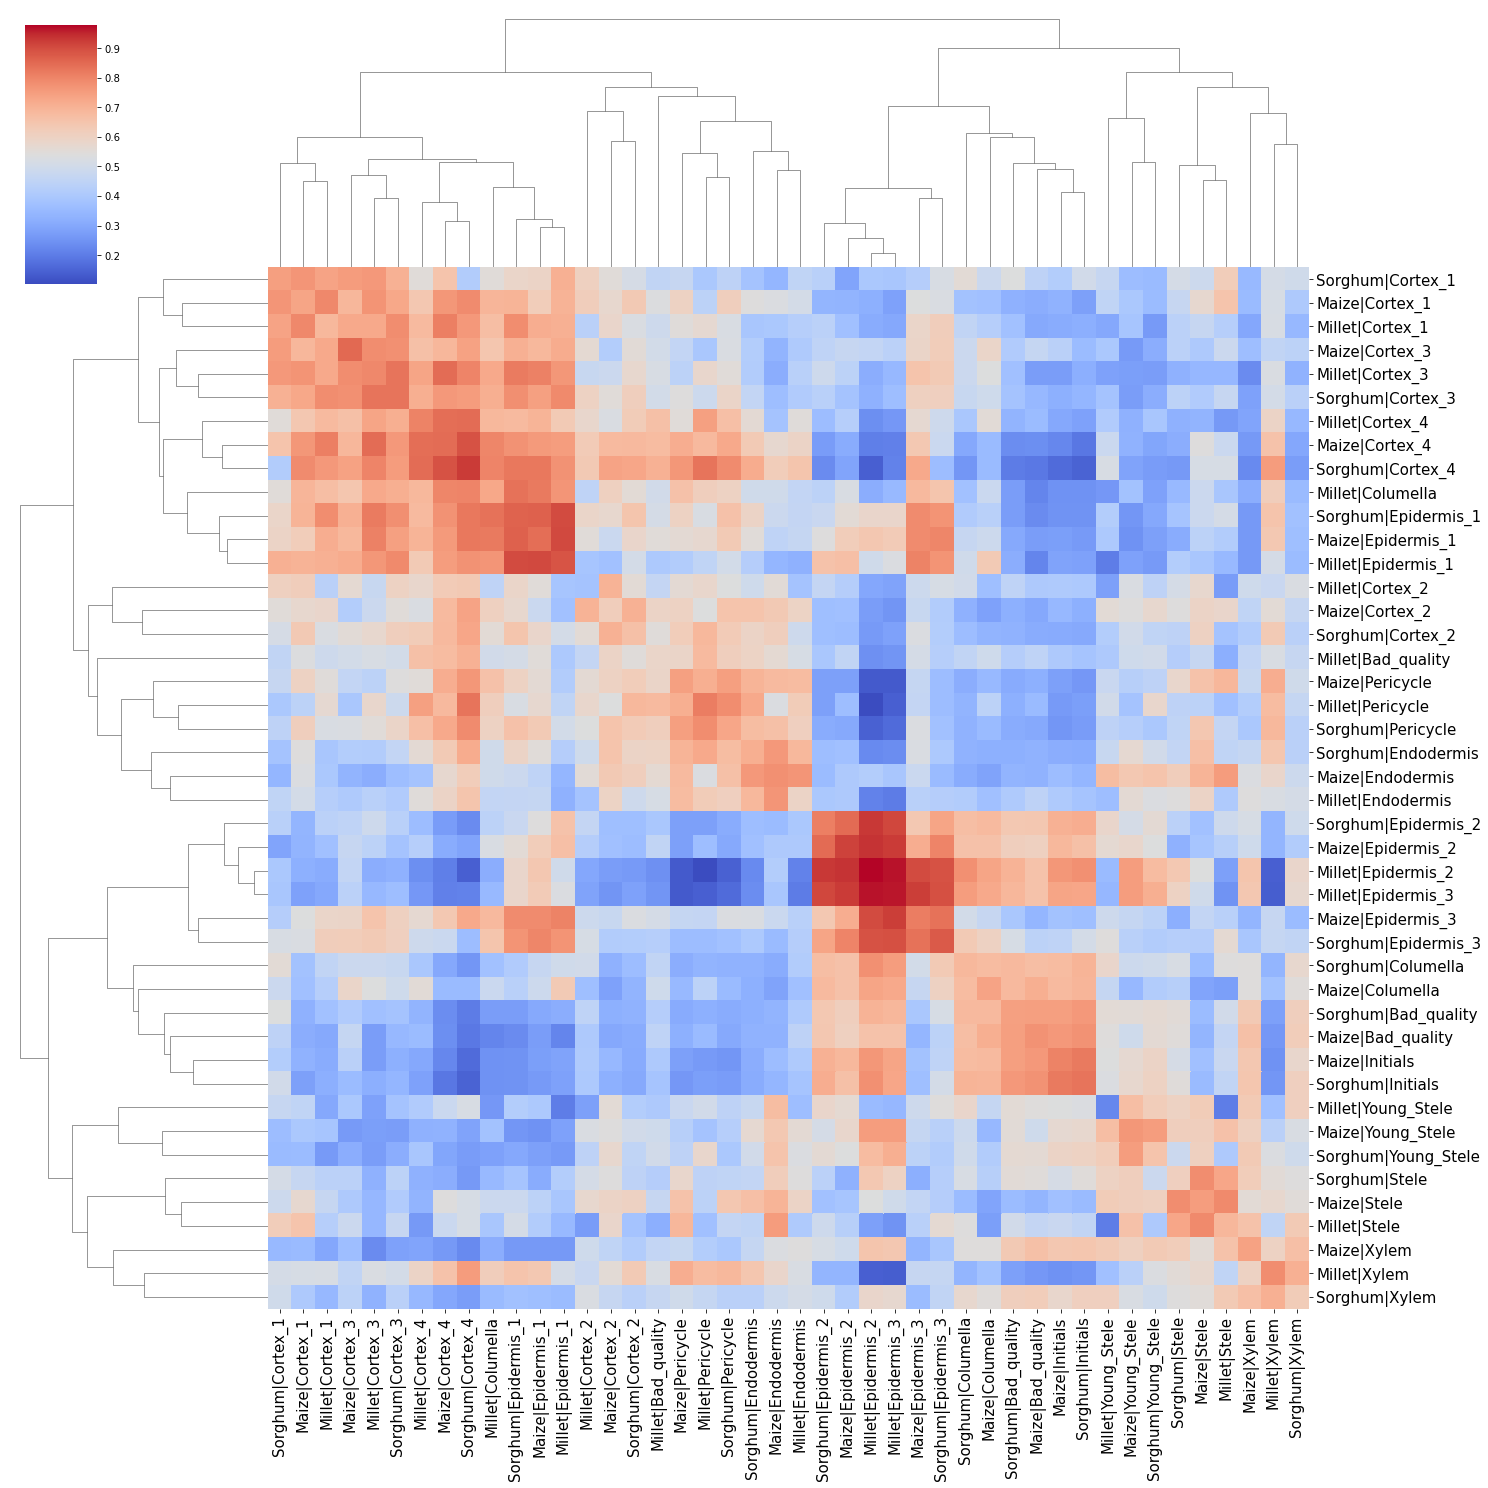

In [23]:
pymn.variableGenes(species_all_merged,study_col = 'Species')
pymn.MetaNeighborUS(species_all_merged,study_col = 'Species',ct_col = 'Cell Cluster Annotation')
pymn.plotMetaNeighborUS(species_all_merged,figsize = (20,20),cmap = 'coolwarm',fontsize = 15)

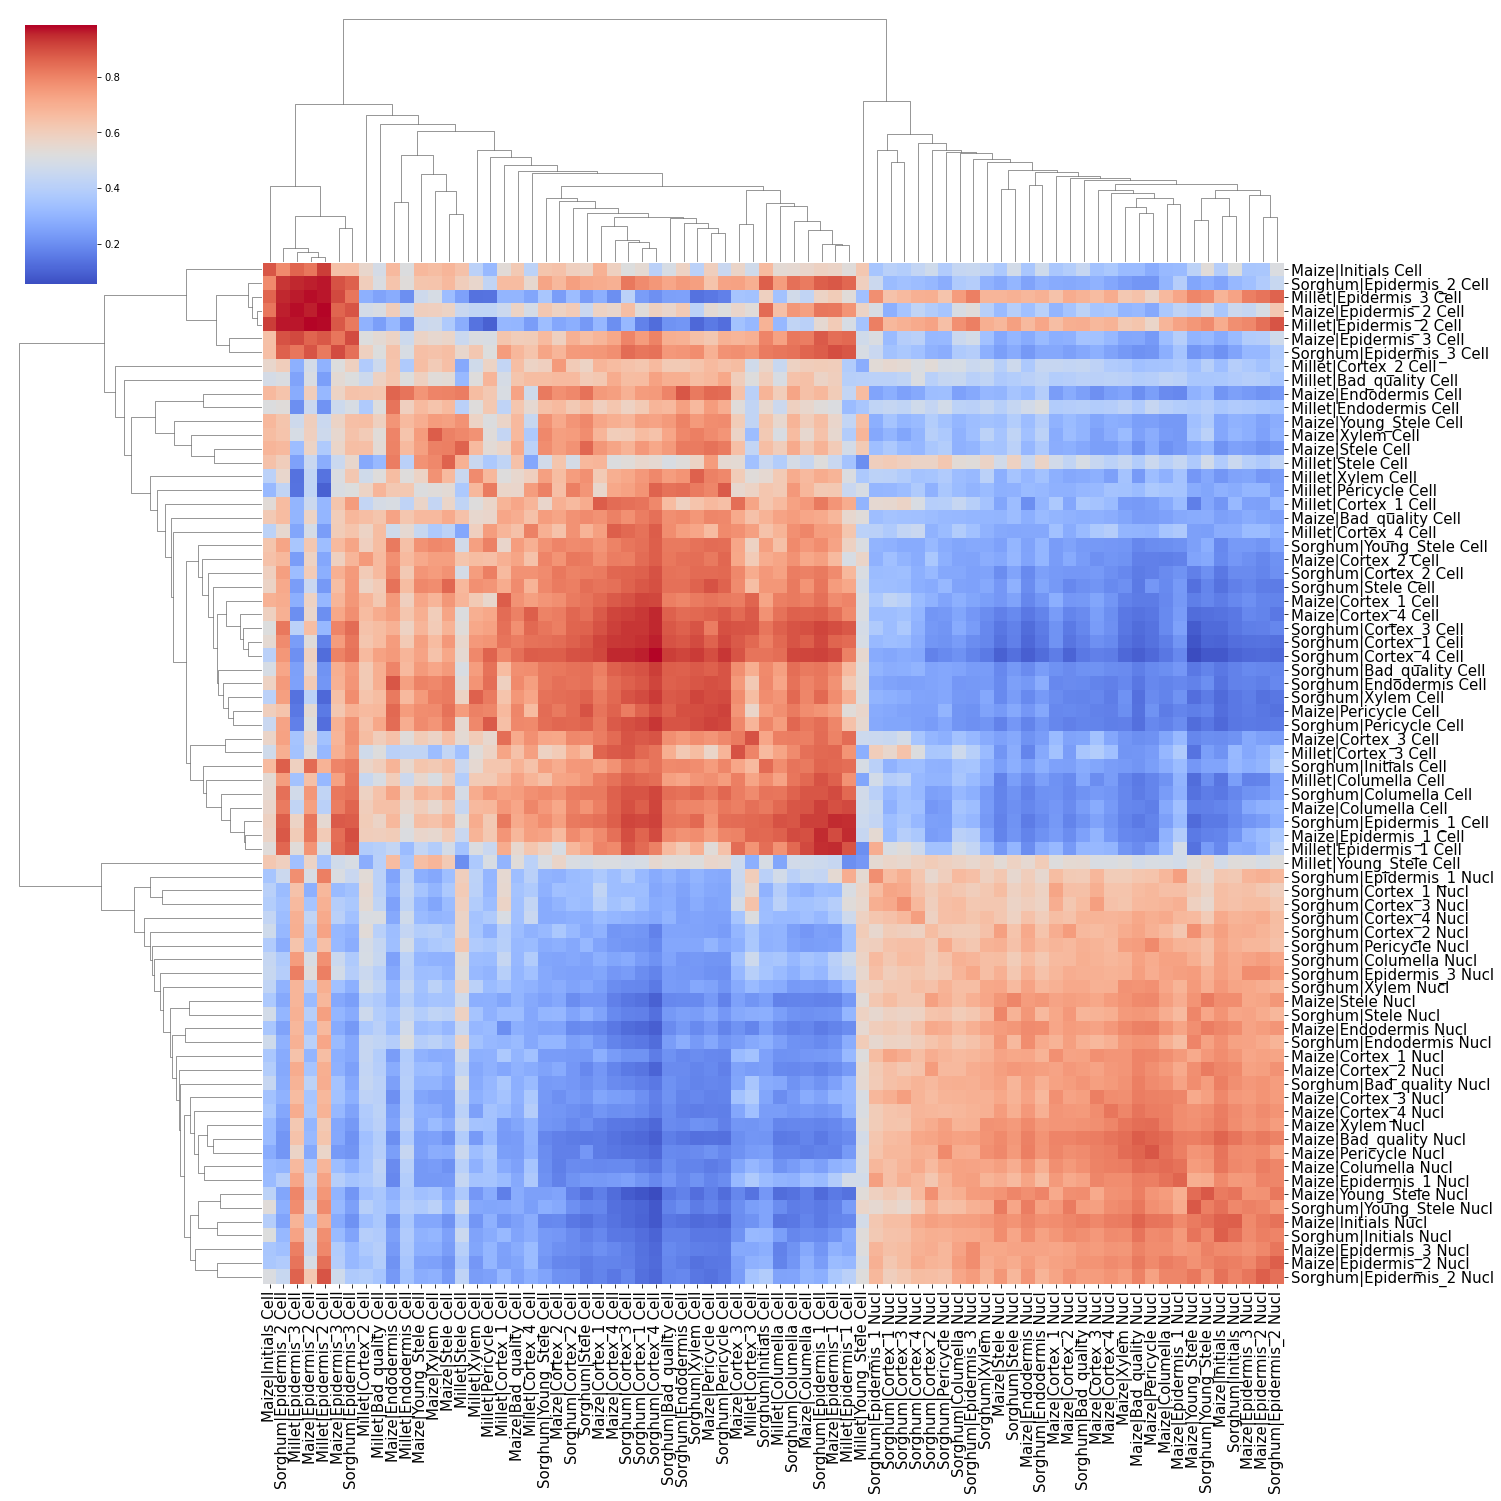

In [24]:
pymn.MetaNeighborUS(species_all_merged,study_col = 'Species',ct_col = 'Cluster and Type')
g = pymn.plotMetaNeighborUS(species_all_merged,figsize = (20,20),cmap = 'coolwarm',fontsize = 15,show = False)
g.savefig('/home/passala/Gene_duplication_project/Code/Bruno_maize_sorghum_project/Figures/seperated_cells_and_nuclei_run_together.jpg')

In [25]:
calculated_variable_genes_all_nuclei = species_all_merged[species_all_merged.obs_names.str.contains('Nucl')]
calculated_variable_genes_all_cells = species_all_merged[species_all_merged.obs_names.str.contains('Cell')]


Trying to set attribute `.var` of view, copying.


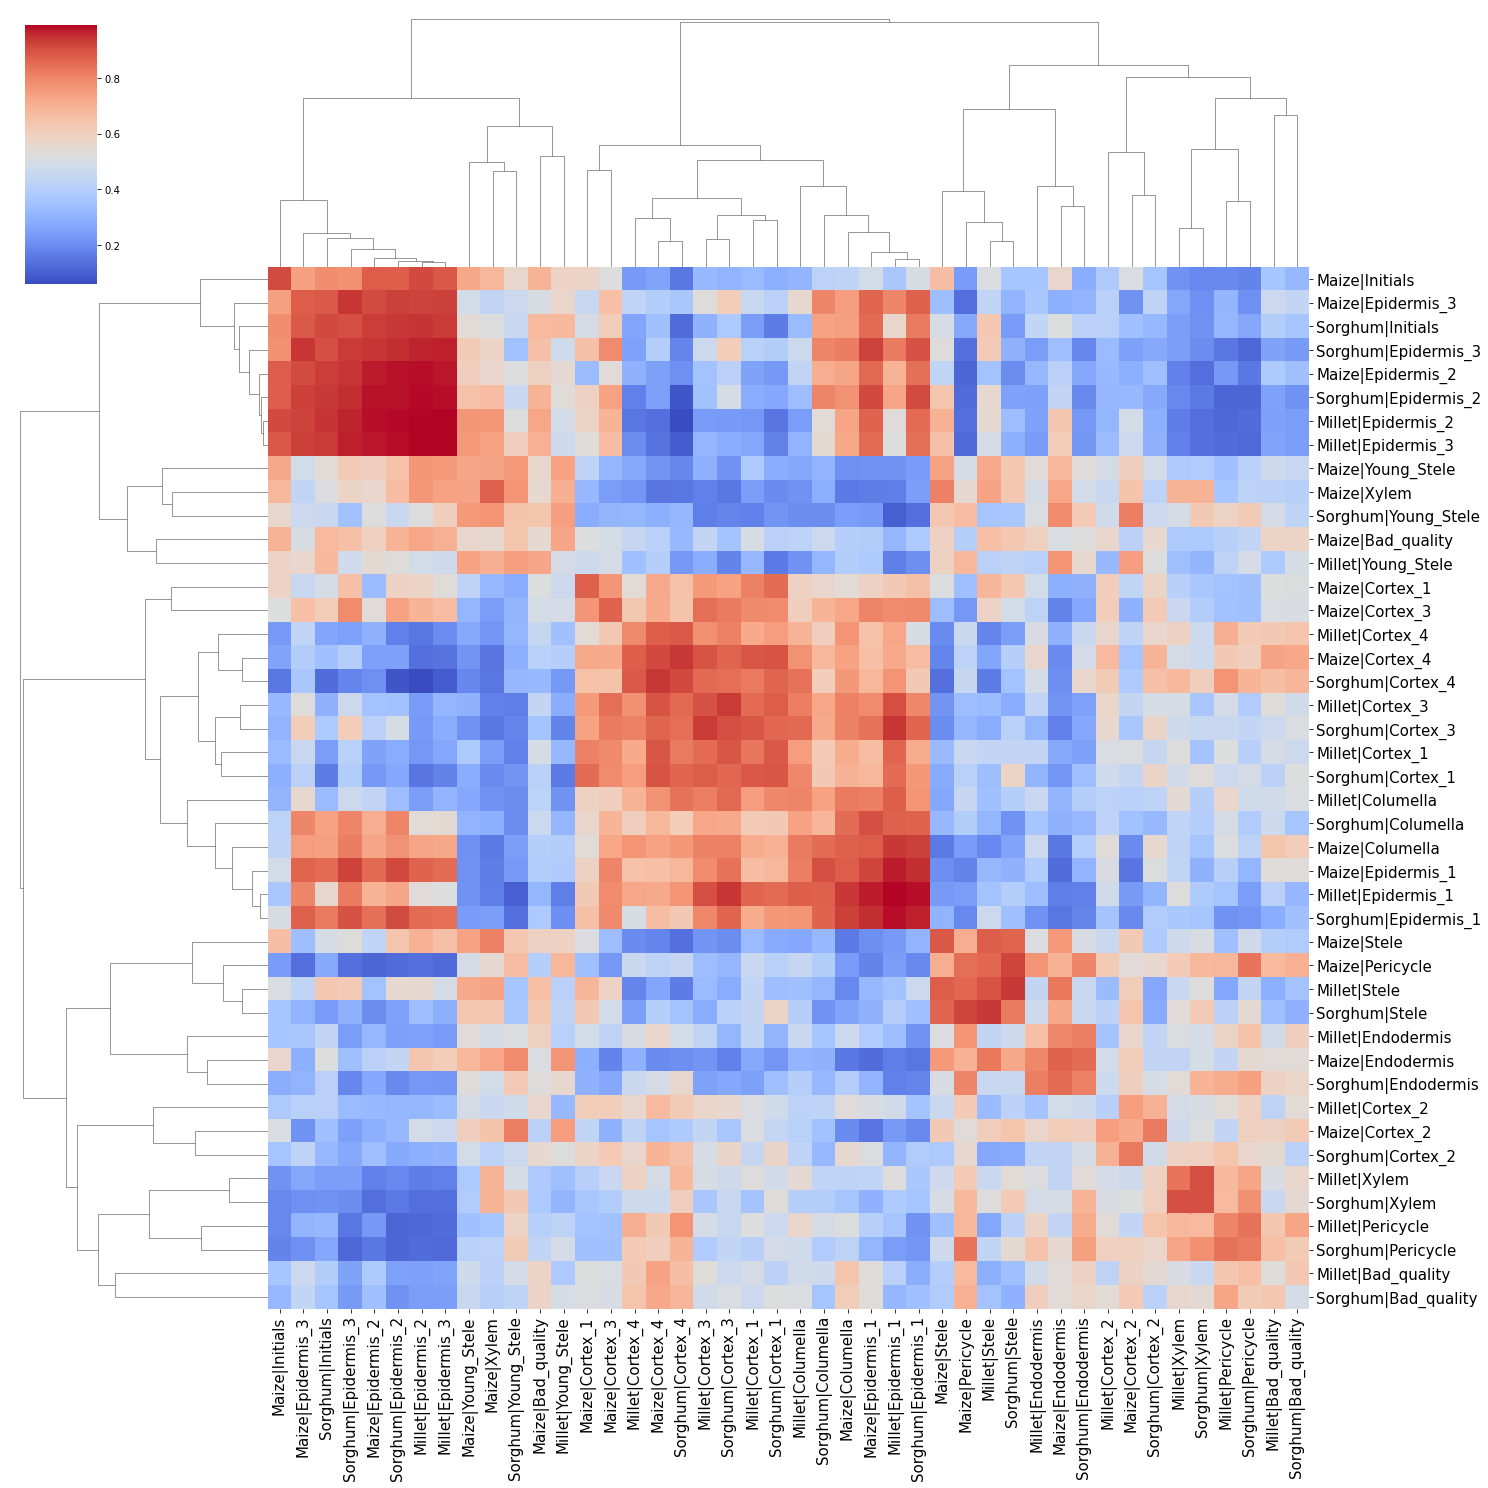

In [26]:
pymn.variableGenes(all_cells_all_species,study_col = 'Species')
pymn.MetaNeighborUS(all_cells_all_species,study_col = 'Species',ct_col = 'Cell Cluster Annotation')
g = pymn.plotMetaNeighborUS(all_cells_all_species,figsize = (20,20),cmap = 'coolwarm',fontsize = 15,show = False)
g.savefig('/home/passala/Gene_duplication_project/Code/Bruno_maize_sorghum_project/Figures/all_cells_metaneighbor.jpg')

Trying to set attribute `.var` of view, copying.


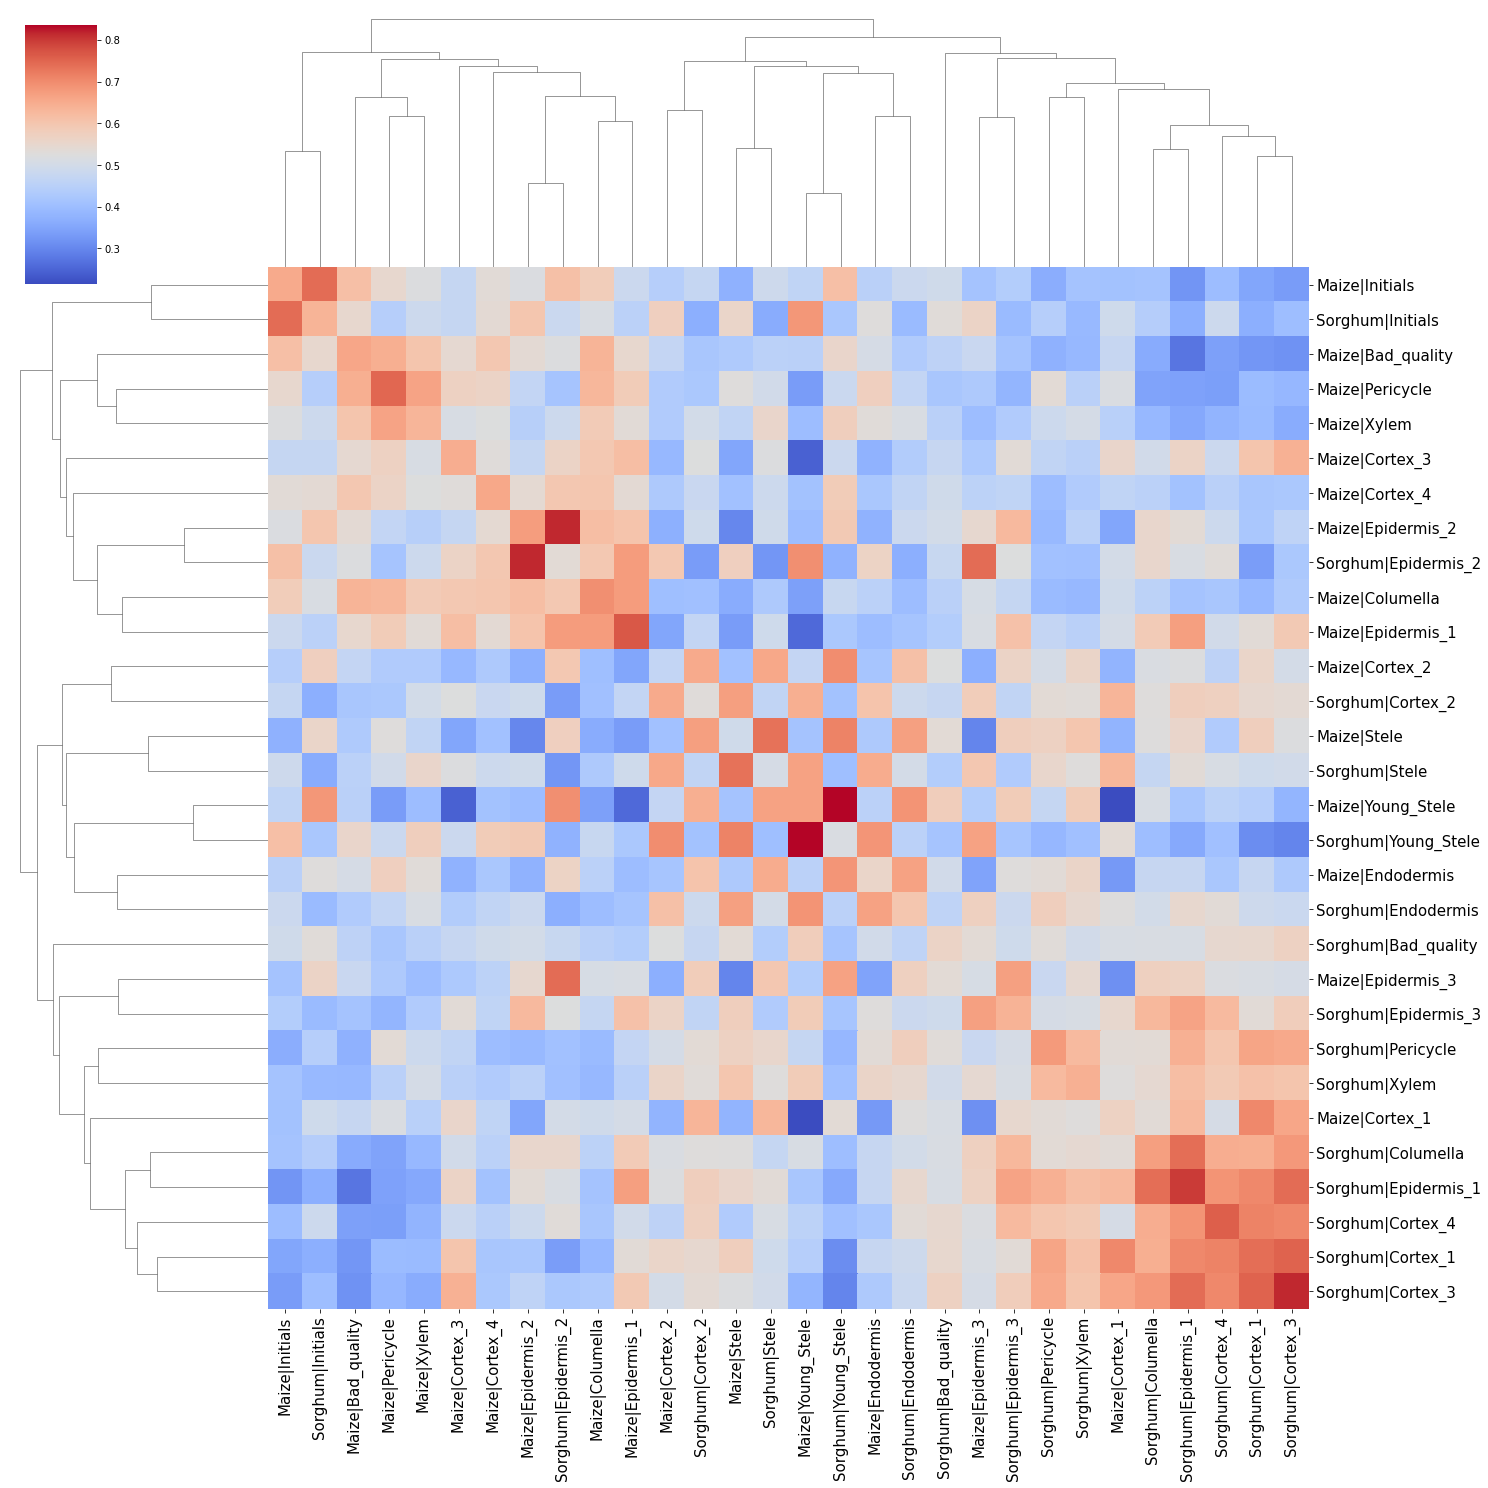

In [27]:
pymn.variableGenes(all_nuclei_all_species,study_col = 'Species')
pymn.MetaNeighborUS(all_nuclei_all_species,study_col = 'Species',ct_col = 'Cell Cluster Annotation')
g = pymn.plotMetaNeighborUS(all_nuclei_all_species,figsize = (20,20),cmap = 'coolwarm',fontsize = 15,show = False)
g.savefig('/home/passala/Gene_duplication_project/Code/Bruno_maize_sorghum_project/Figures/all_nuclei_metaneighbor.jpg')

Trying to set attribute `.uns` of view, copying.


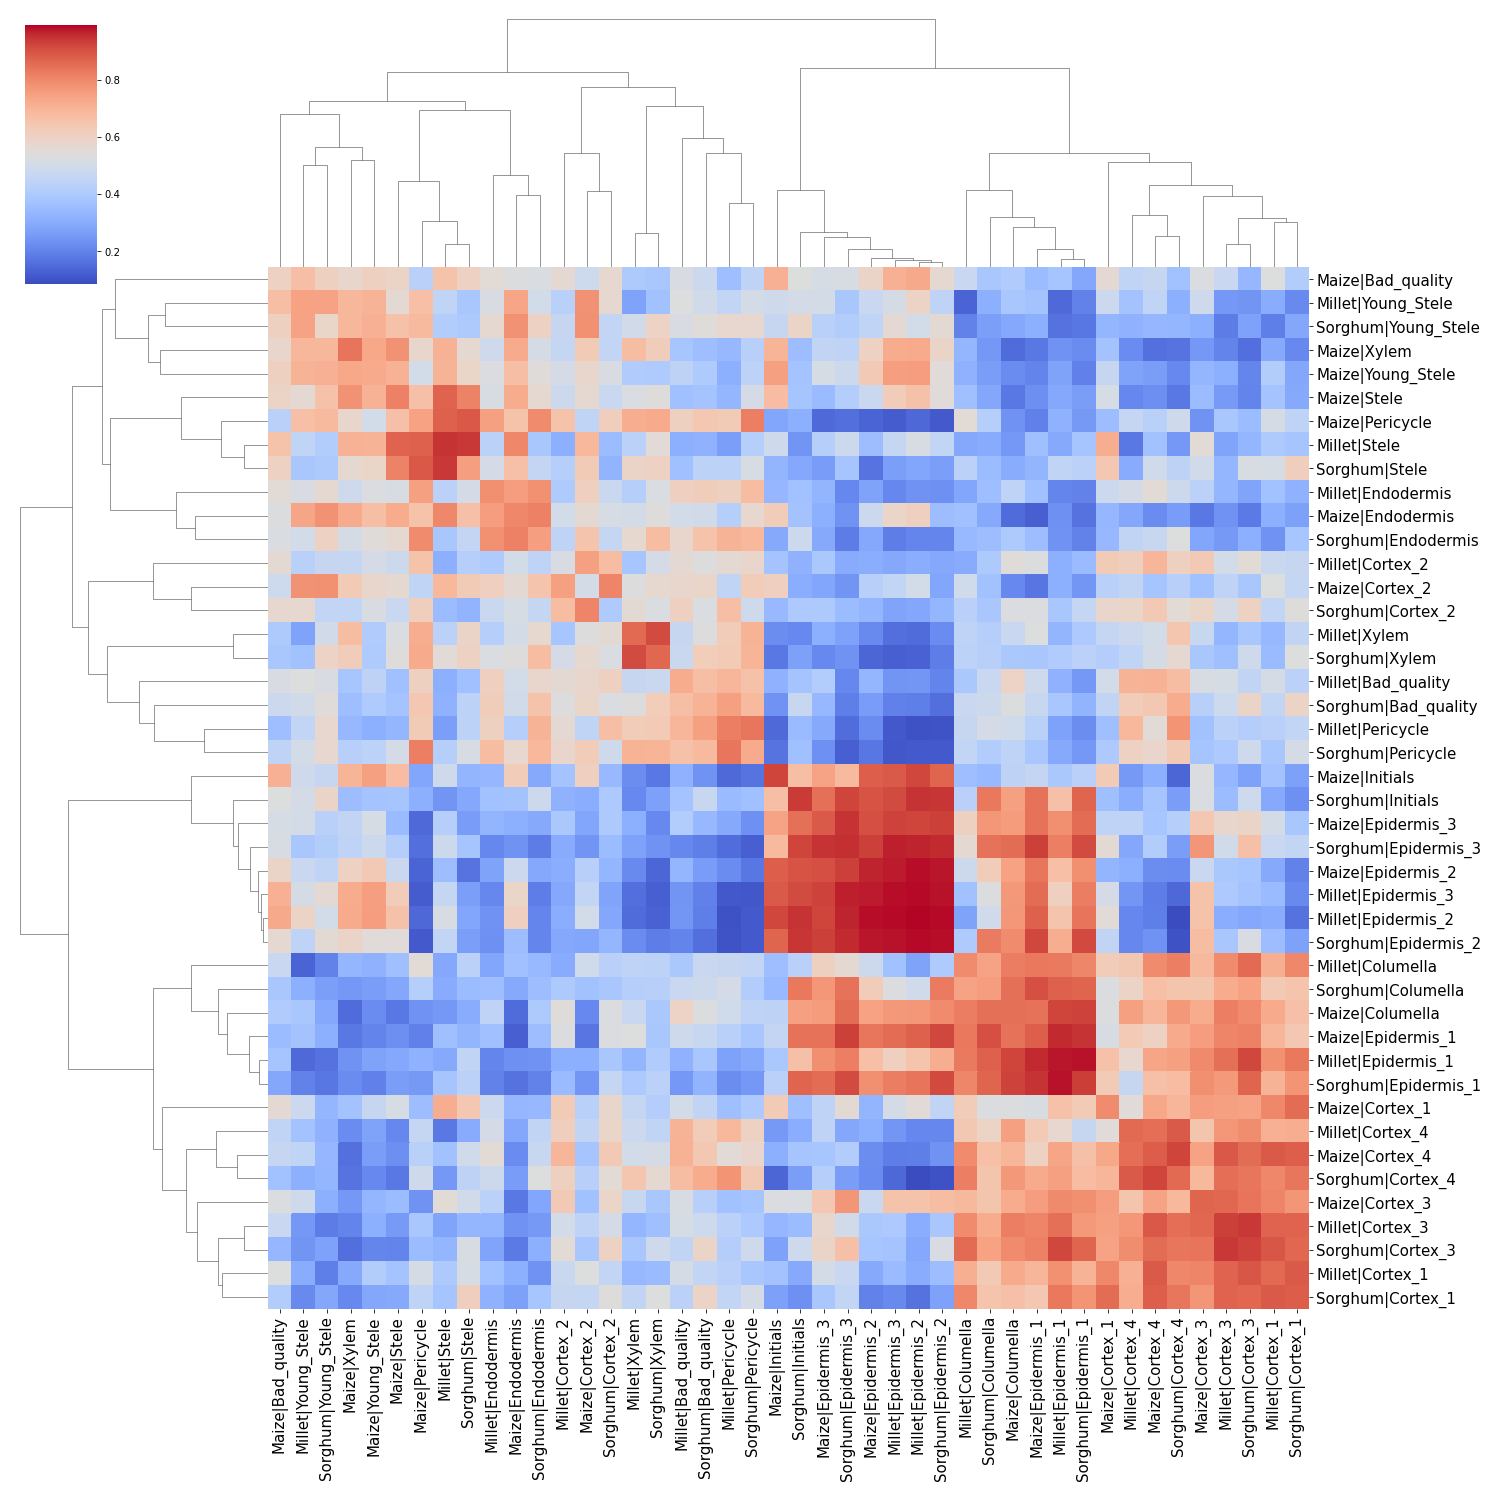

In [28]:
pymn.MetaNeighborUS(calculated_variable_genes_all_cells,study_col = 'Species',ct_col = 'Cell Cluster Annotation')
pymn.plotMetaNeighborUS(calculated_variable_genes_all_cells,figsize = (20,20),cmap = 'coolwarm',fontsize = 15)

Trying to set attribute `.uns` of view, copying.


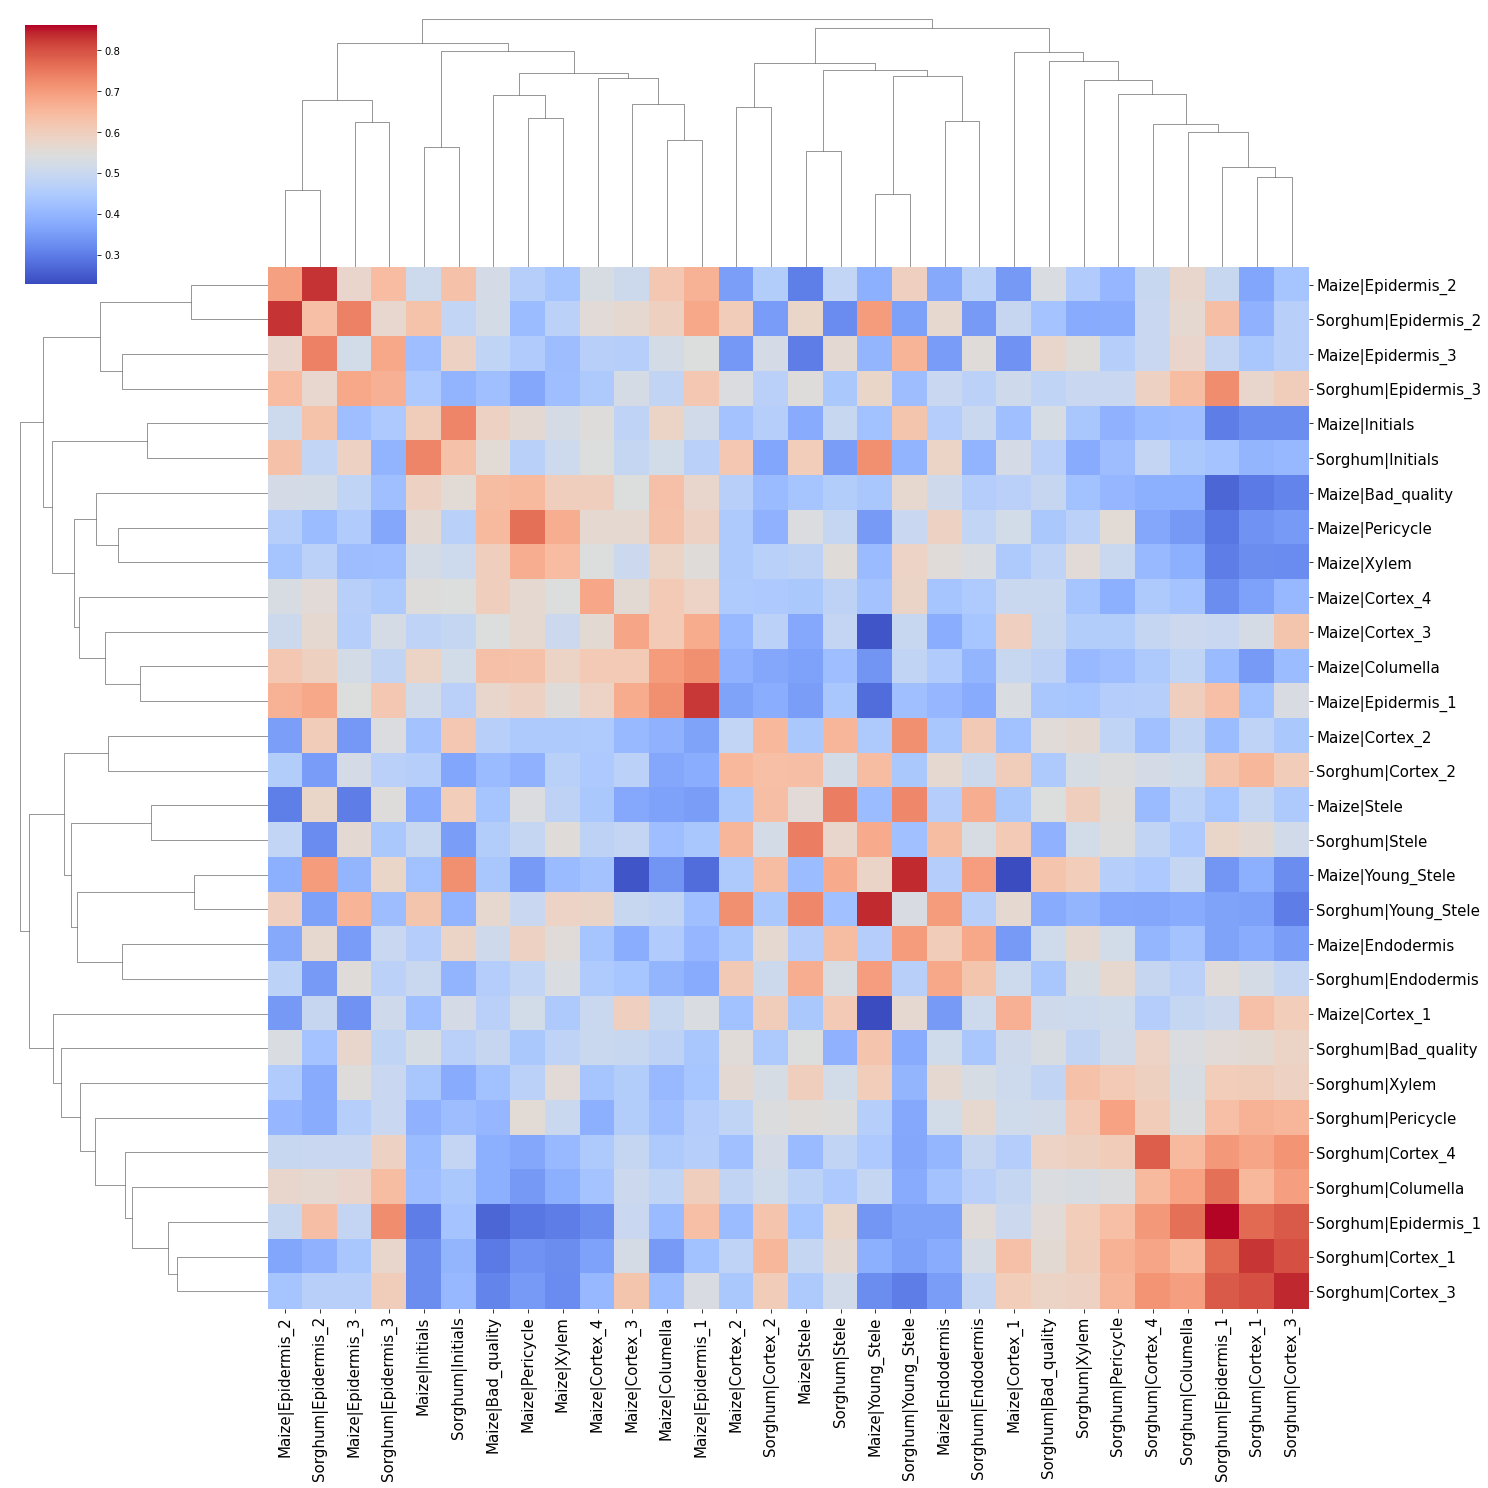

In [29]:
pymn.MetaNeighborUS(calculated_variable_genes_all_nuclei,study_col = 'Species',ct_col = 'Cell Cluster Annotation')
pymn.plotMetaNeighborUS(calculated_variable_genes_all_nuclei,figsize = (20,20),cmap = 'coolwarm',fontsize = 15)

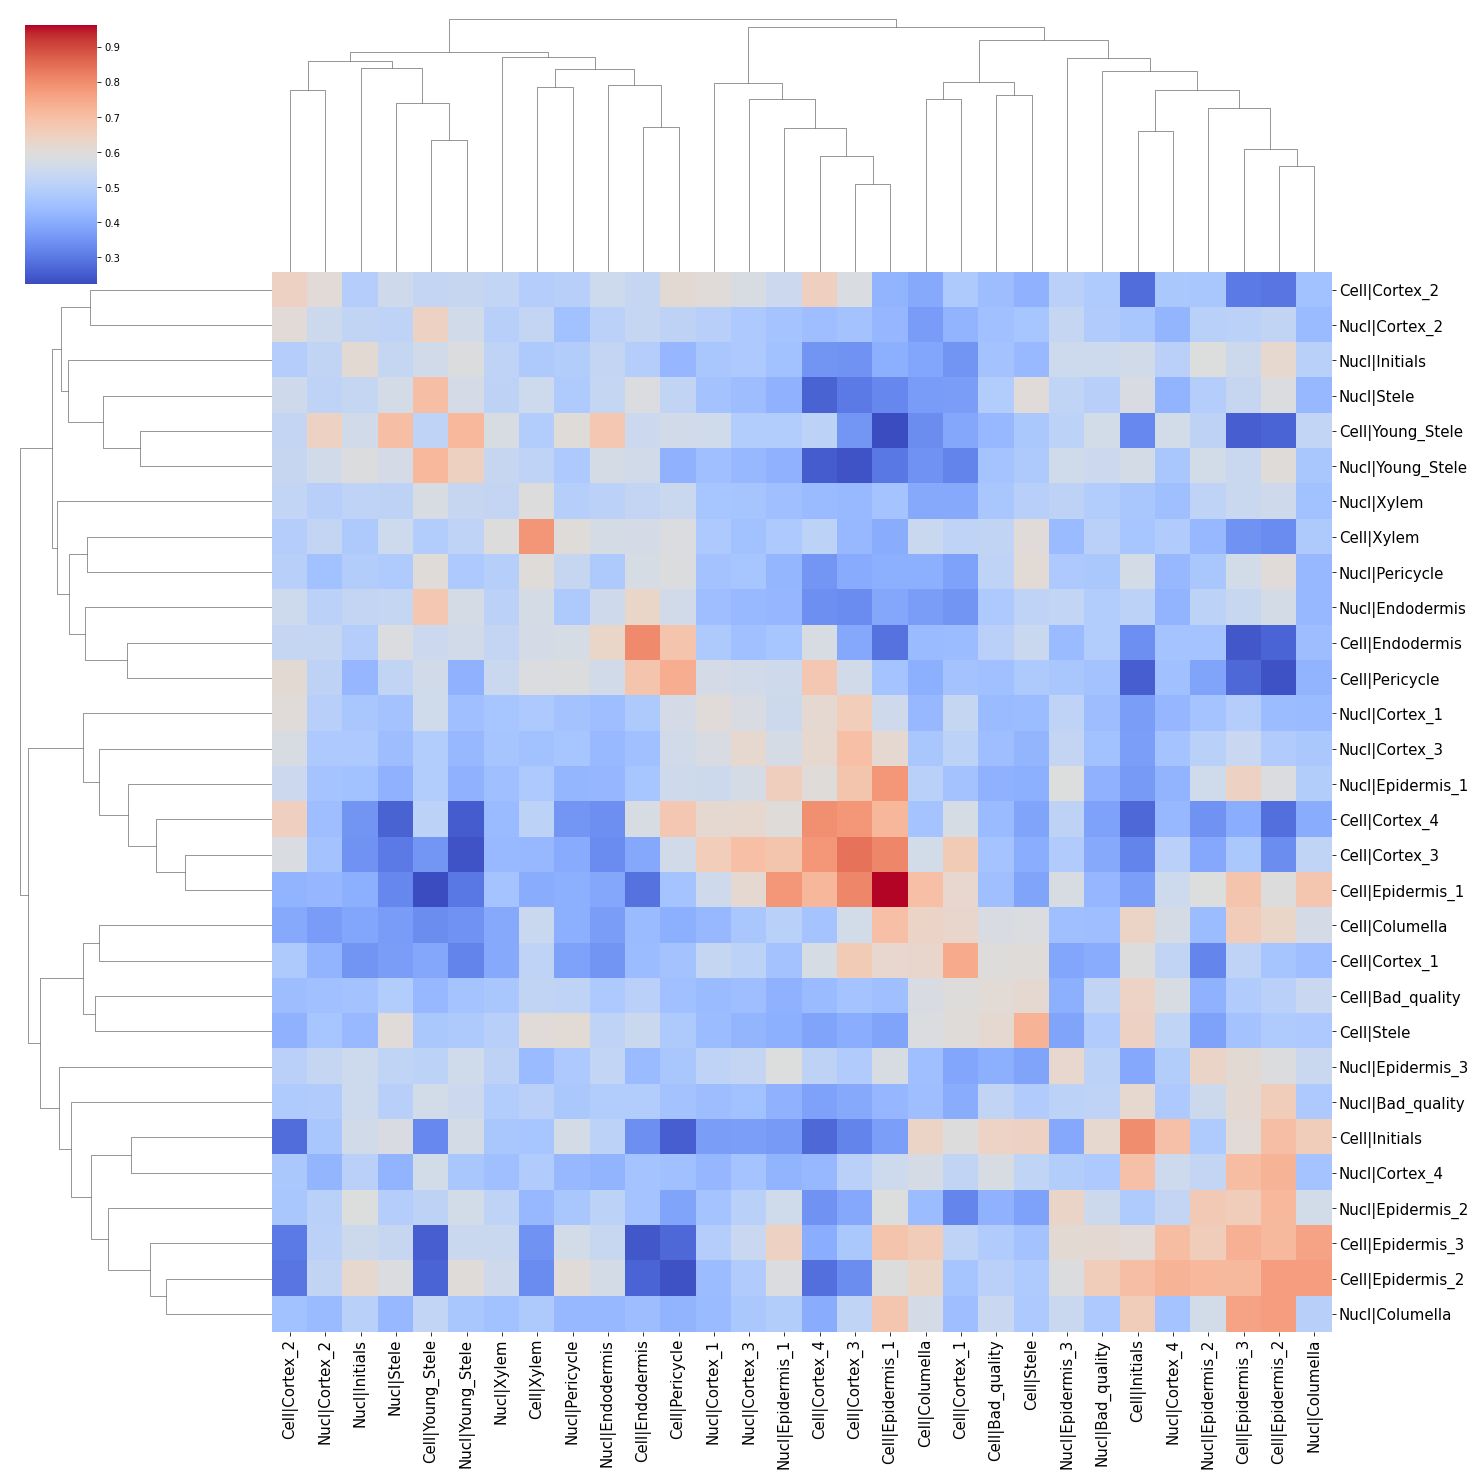

In [30]:
species_all_merged_across_cell_types_as_batches
pymn.variableGenes(species_all_merged_across_cell_types_as_batches,study_col = 'Type')
pymn.MetaNeighborUS(species_all_merged_across_cell_types_as_batches,study_col = 'Type',ct_col = 'Cell Cluster Annotation')
g = pymn.plotMetaNeighborUS(species_all_merged_across_cell_types_as_batches,figsize = (20,20),cmap = 'coolwarm',fontsize = 15,show = False)
g.savefig('/home/passala/Gene_duplication_project/Code/Bruno_maize_sorghum_project/Figures/seperated_cells_and_nuclei_across_celltypes_merged_species.jpg')

Trying to set attribute `.var` of view, copying.


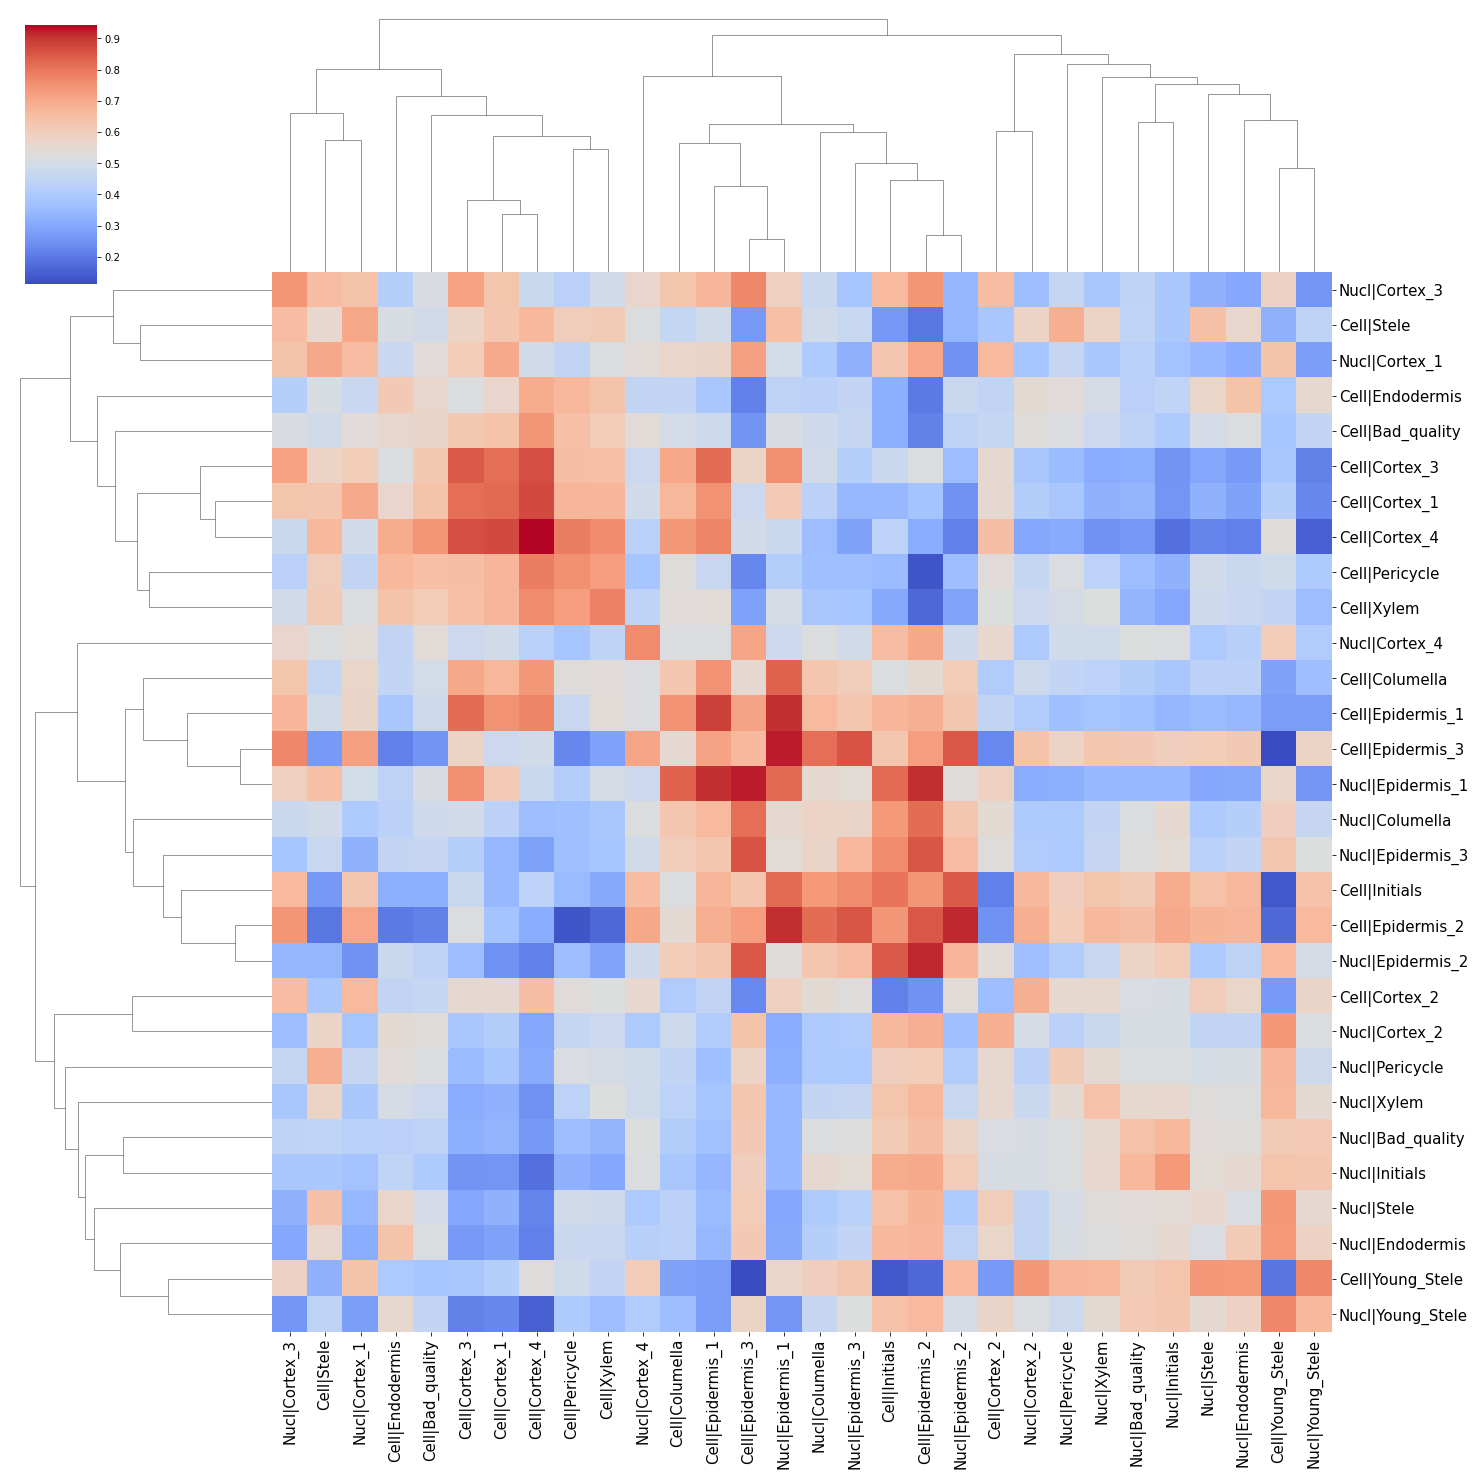

In [31]:

pymn.variableGenes(just_sorg,study_col = 'Type')
pymn.MetaNeighborUS(just_sorg,study_col = 'Type',ct_col = 'Cell Cluster Annotation')
g = pymn.plotMetaNeighborUS(just_sorg,figsize = (20,20),cmap = 'coolwarm',fontsize = 15,show = False)
g.savefig('/home/passala/Gene_duplication_project/Code/Bruno_maize_sorghum_project/Figures/seperated_cells_and_nuclei_just_sorg.jpg')

Trying to set attribute `.var` of view, copying.


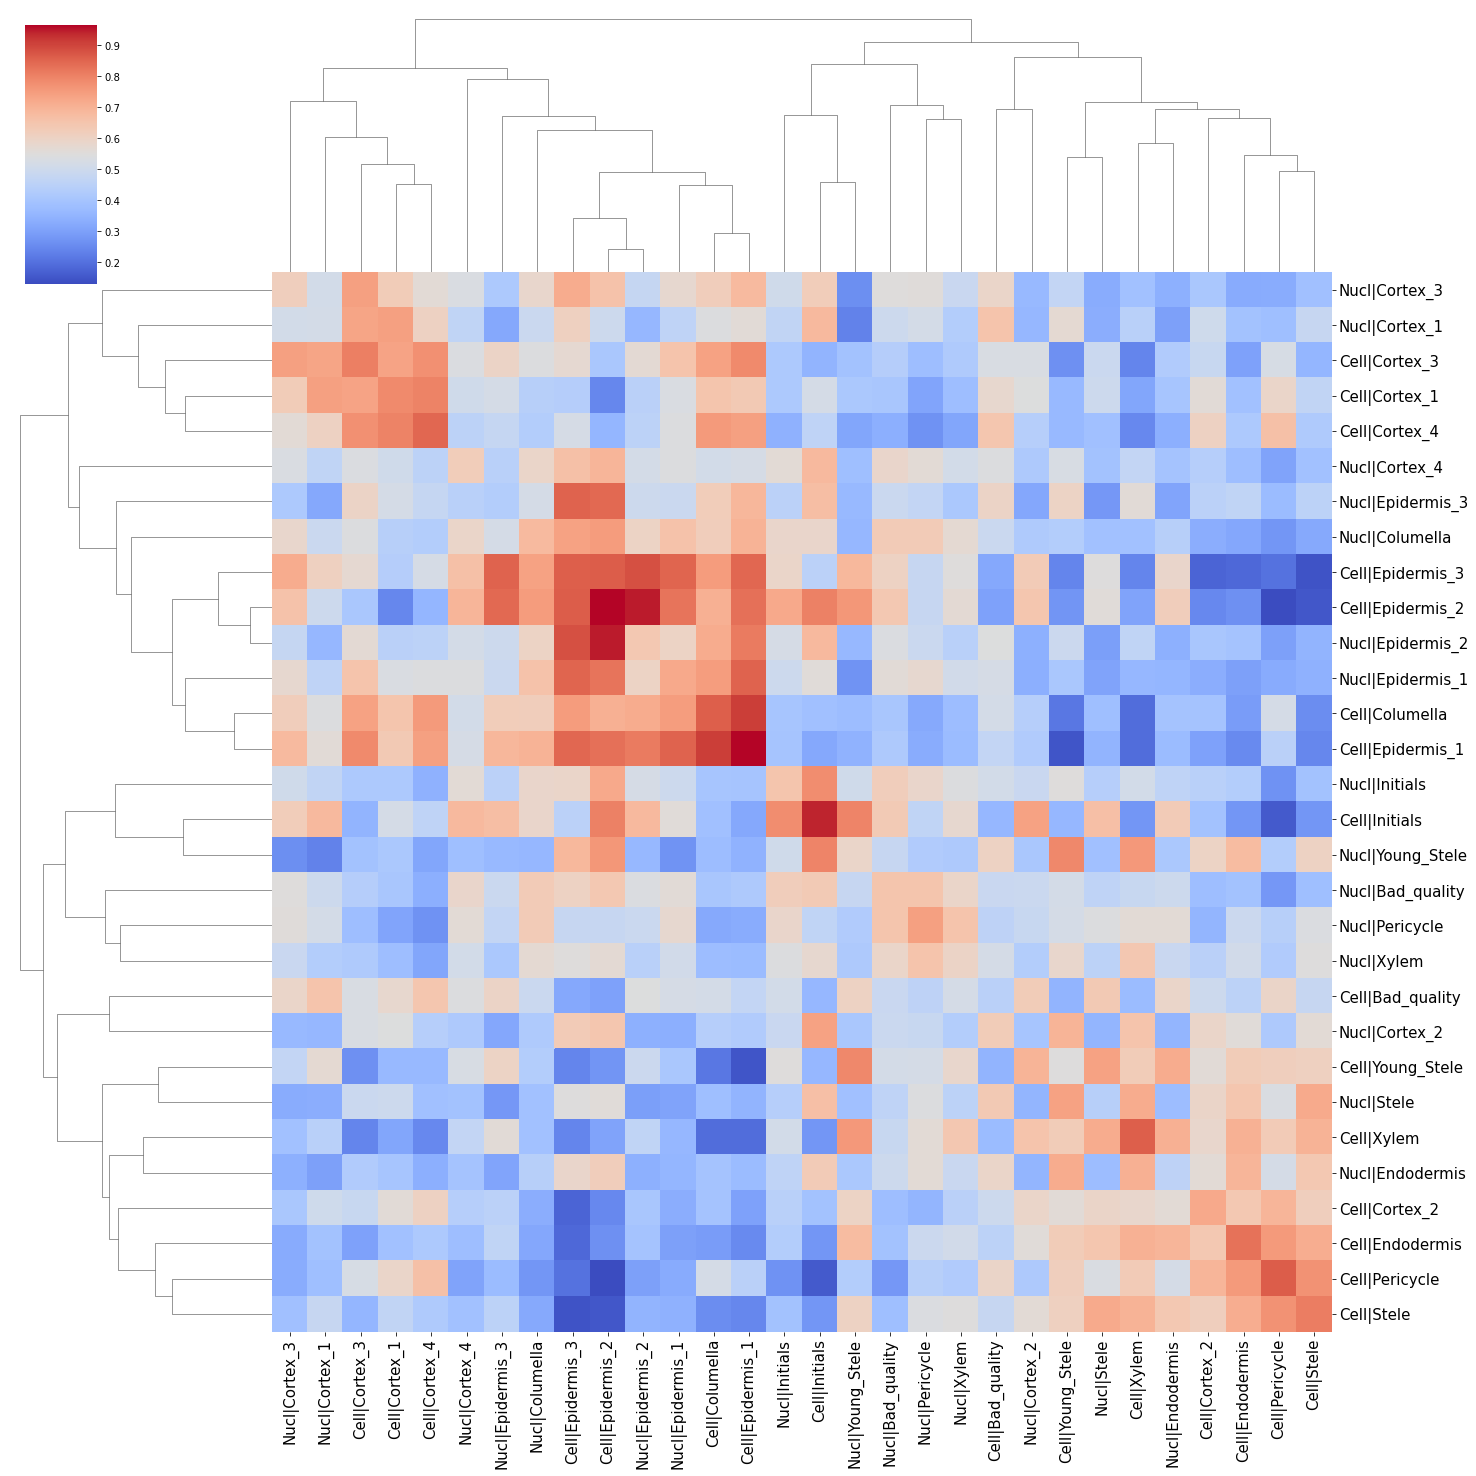

In [32]:
pymn.variableGenes(just_maize,study_col = 'Type')
pymn.MetaNeighborUS(just_maize,study_col = 'Type',ct_col = 'Cell Cluster Annotation')
g = pymn.plotMetaNeighborUS(just_maize,figsize = (20,20),cmap = 'coolwarm',fontsize = 15,show = False)
g.savefig('/home/passala/Gene_duplication_project/Code/Bruno_maize_sorghum_project/Figures/seperated_cells_and_nuclei_just_maize.jpg')

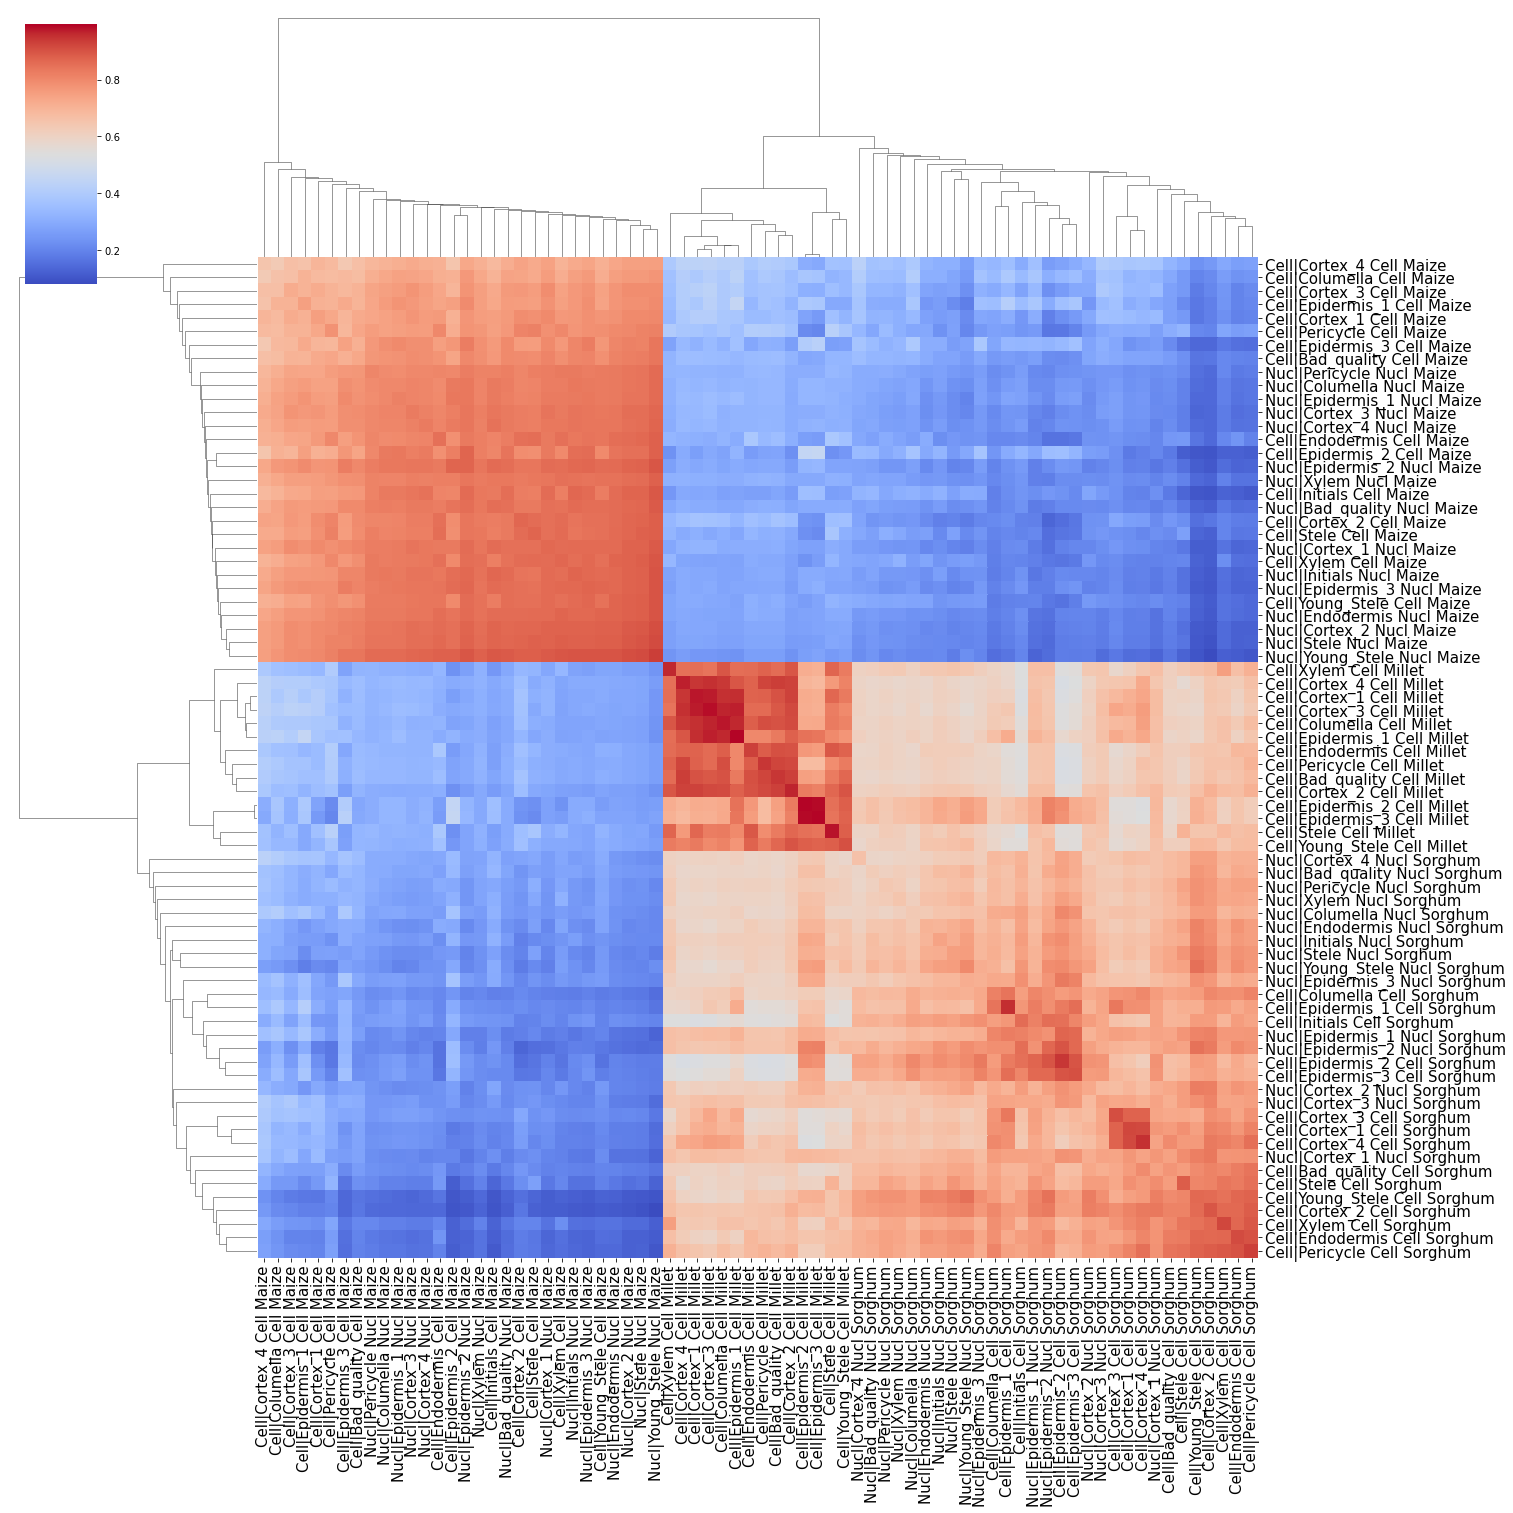

In [33]:
pymn.MetaNeighborUS(species_all_merged_across_cell_types_as_batches,study_col = 'Type',ct_col = 'Cluster and Species')
g = pymn.plotMetaNeighborUS(species_all_merged_across_cell_types_as_batches,figsize = (20,20),cmap = 'coolwarm',fontsize = 15,show = False)
g.savefig('/home/passala/Gene_duplication_project/Code/Bruno_maize_sorghum_project/Figures/seperated_cells_and_nuclei_across_celltypes_all_species_seperate.jpg')

Trying to set attribute `.var` of view, copying.


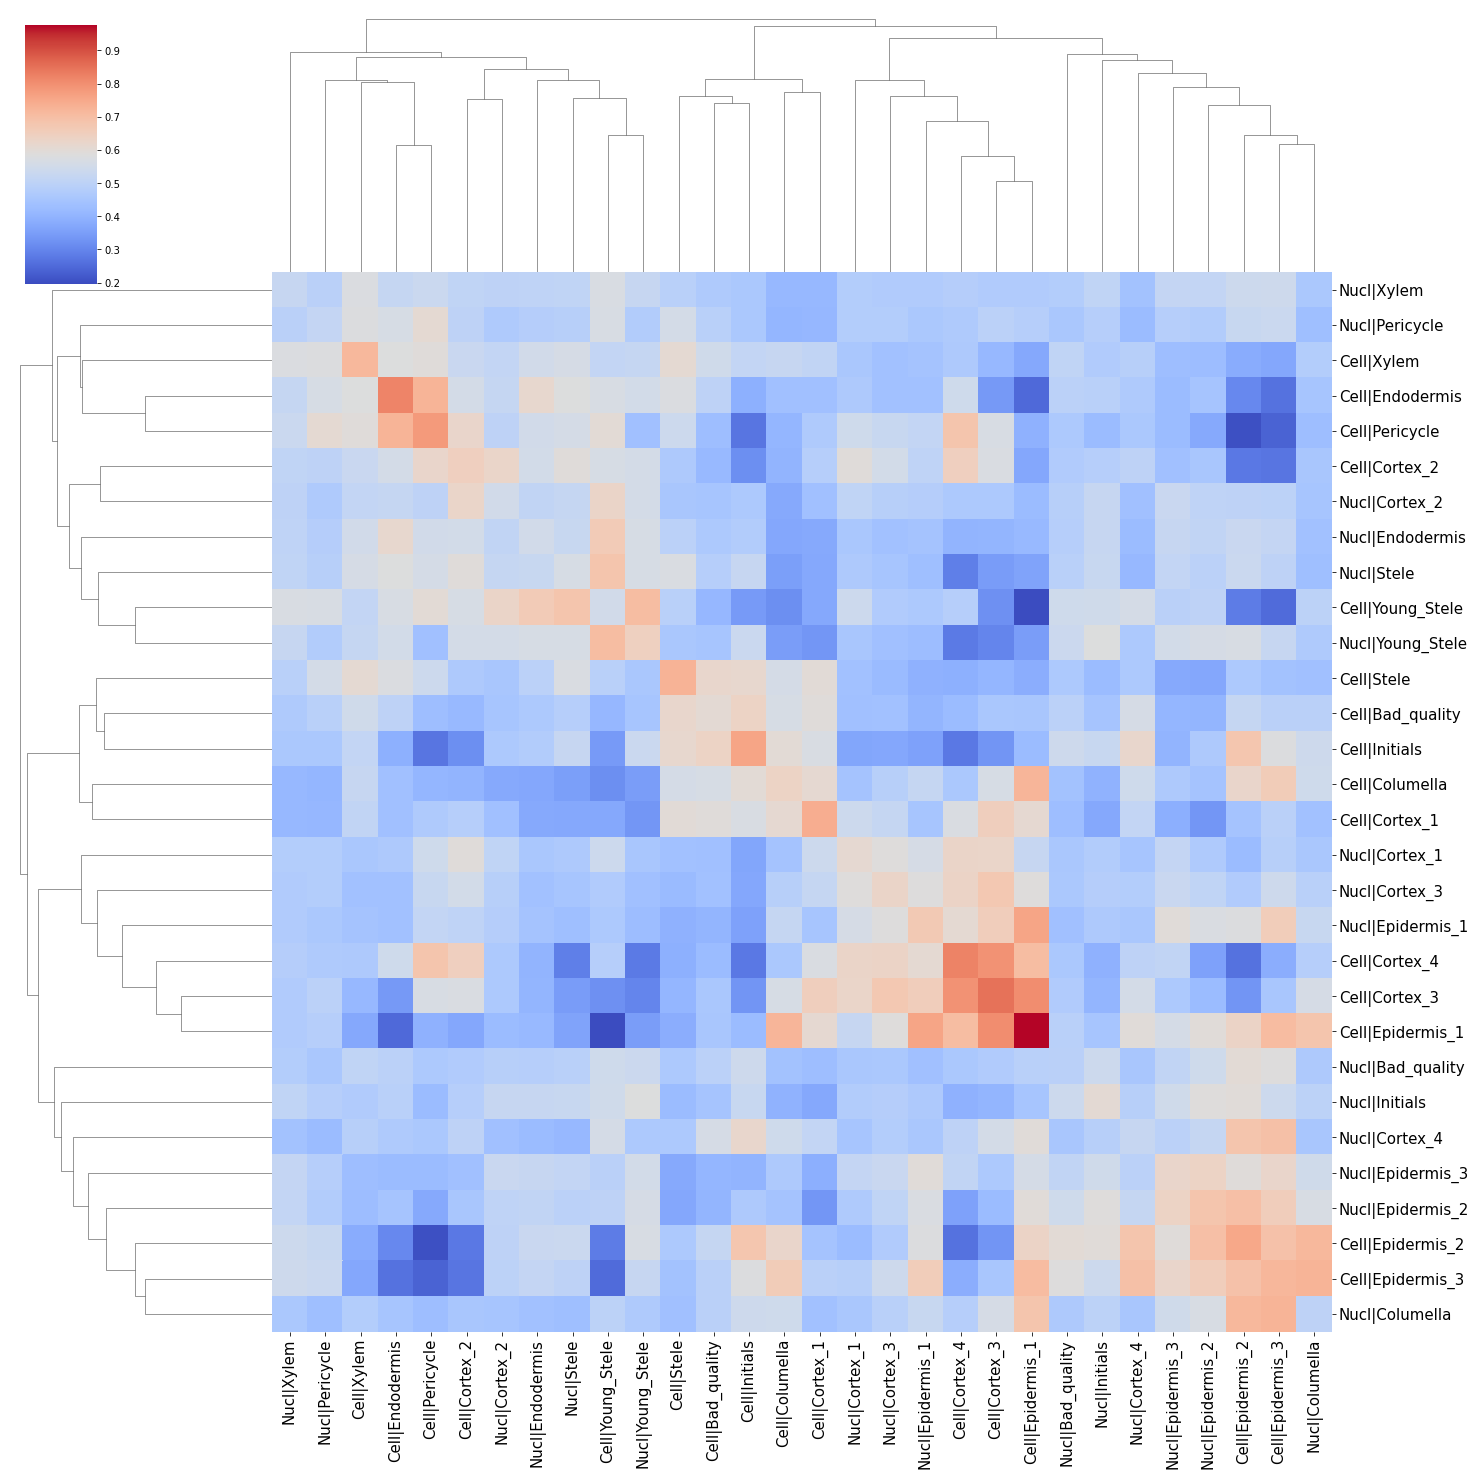

In [34]:

pymn.variableGenes(no_millet_sorg_and_maize,study_col = 'Type')
pymn.MetaNeighborUS(no_millet_sorg_and_maize,study_col = 'Type',ct_col = 'Cell Cluster Annotation')
g = pymn.plotMetaNeighborUS(no_millet_sorg_and_maize,figsize = (20,20),cmap = 'coolwarm',fontsize = 15,show = False)
g.savefig('/home/passala/Gene_duplication_project/Code/Bruno_maize_sorghum_project/Figures/seperated_cells_and_nuclei_no_millet_merged_species.jpg')

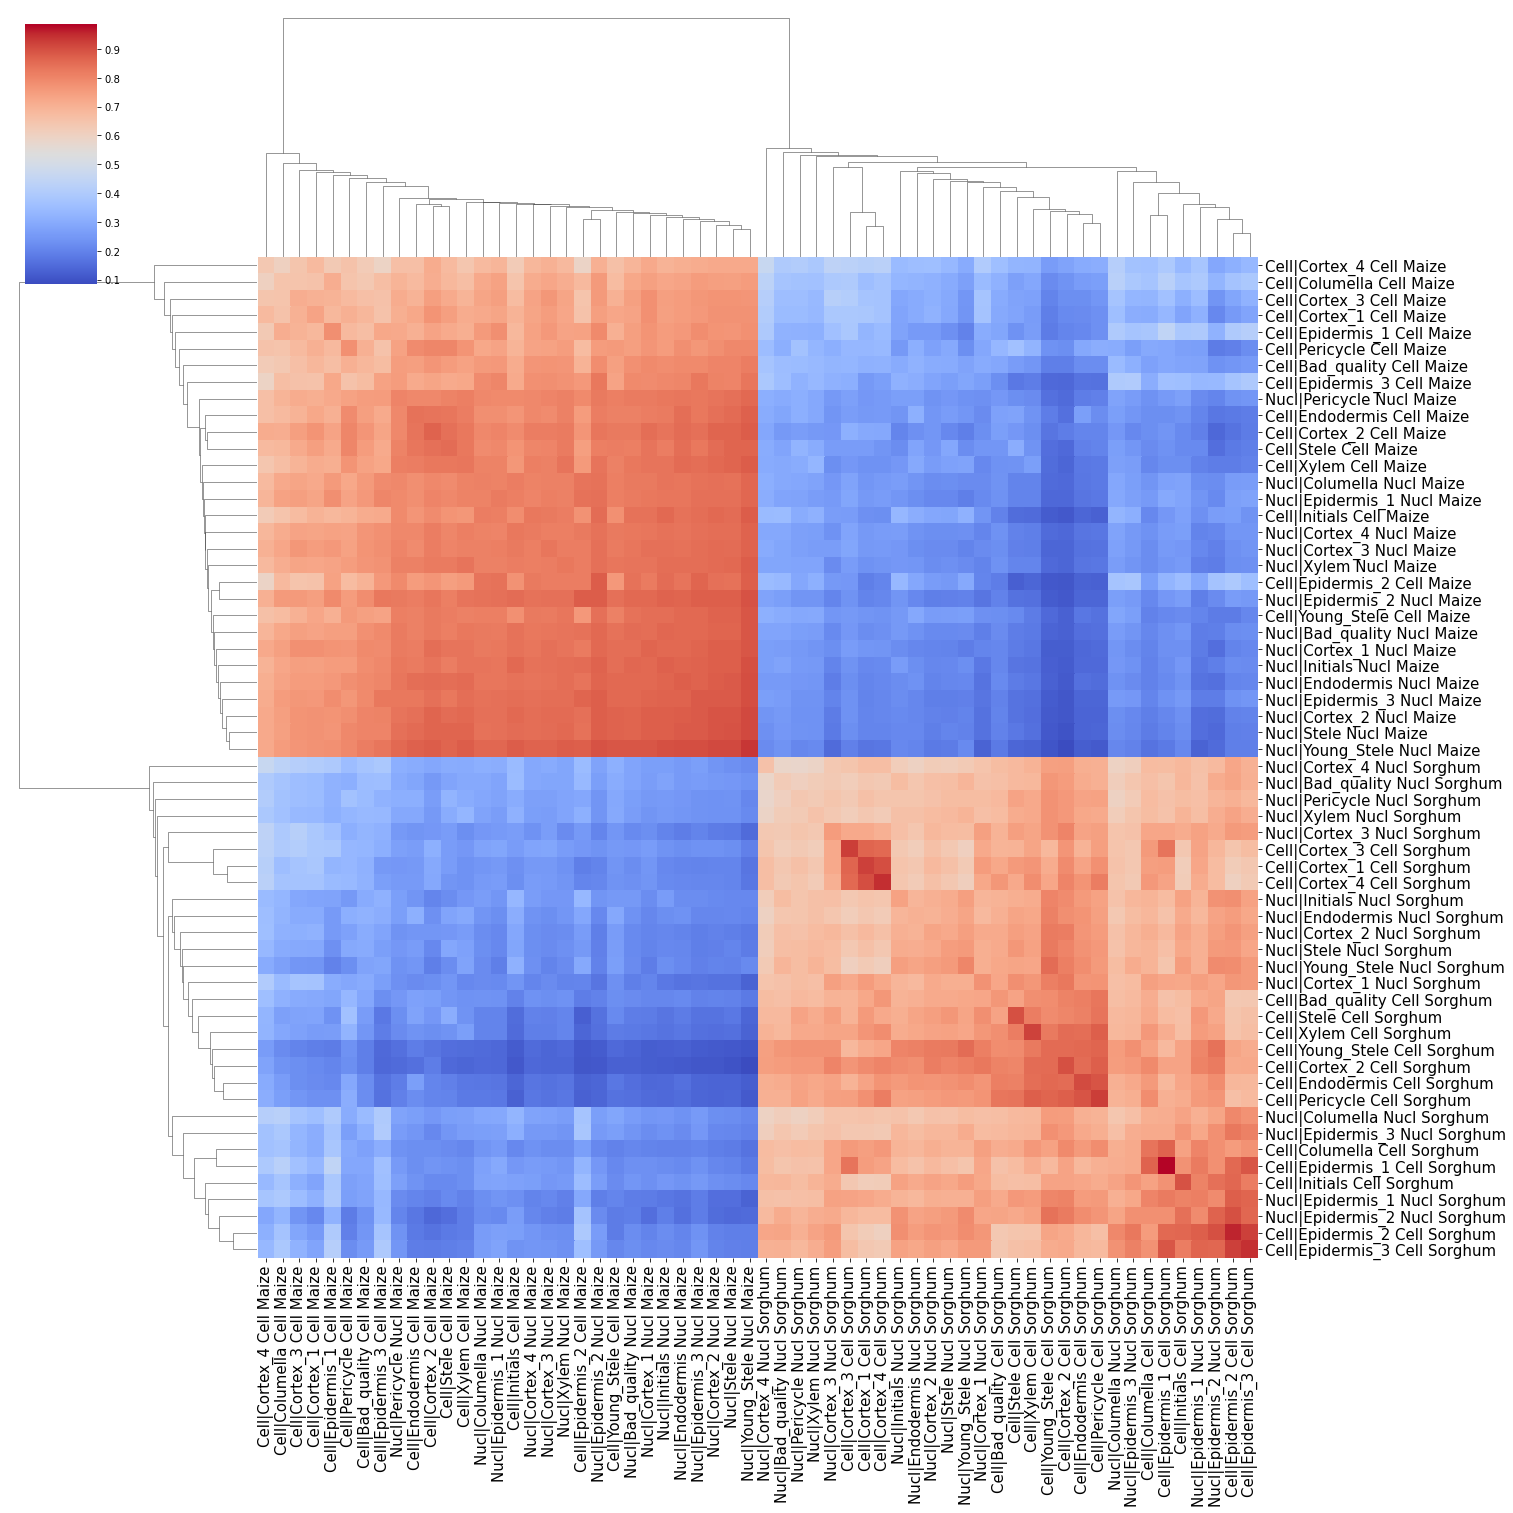

In [35]:
pymn.MetaNeighborUS(no_millet_sorg_and_maize,study_col = 'Type',ct_col = 'Cluster and Species')
g = pymn.plotMetaNeighborUS(no_millet_sorg_and_maize,figsize = (20,20),cmap = 'coolwarm',fontsize = 15,show = False)
g.savefig('/home/passala/Gene_duplication_project/Code/Bruno_maize_sorghum_project/Figures/seperated_cells_and_nuclei_no_millet_seperated_speceis.jpg')

In [36]:
data_for_all_species_done_by_cell_and_species.obs['Type and Species'].value_counts()

Sorghum Nucl    6928
Maize Cell      4324
Sorghum Cell    3524
Maize Nucl      3291
Millet Cell      989
Name: Type and Species, dtype: int64

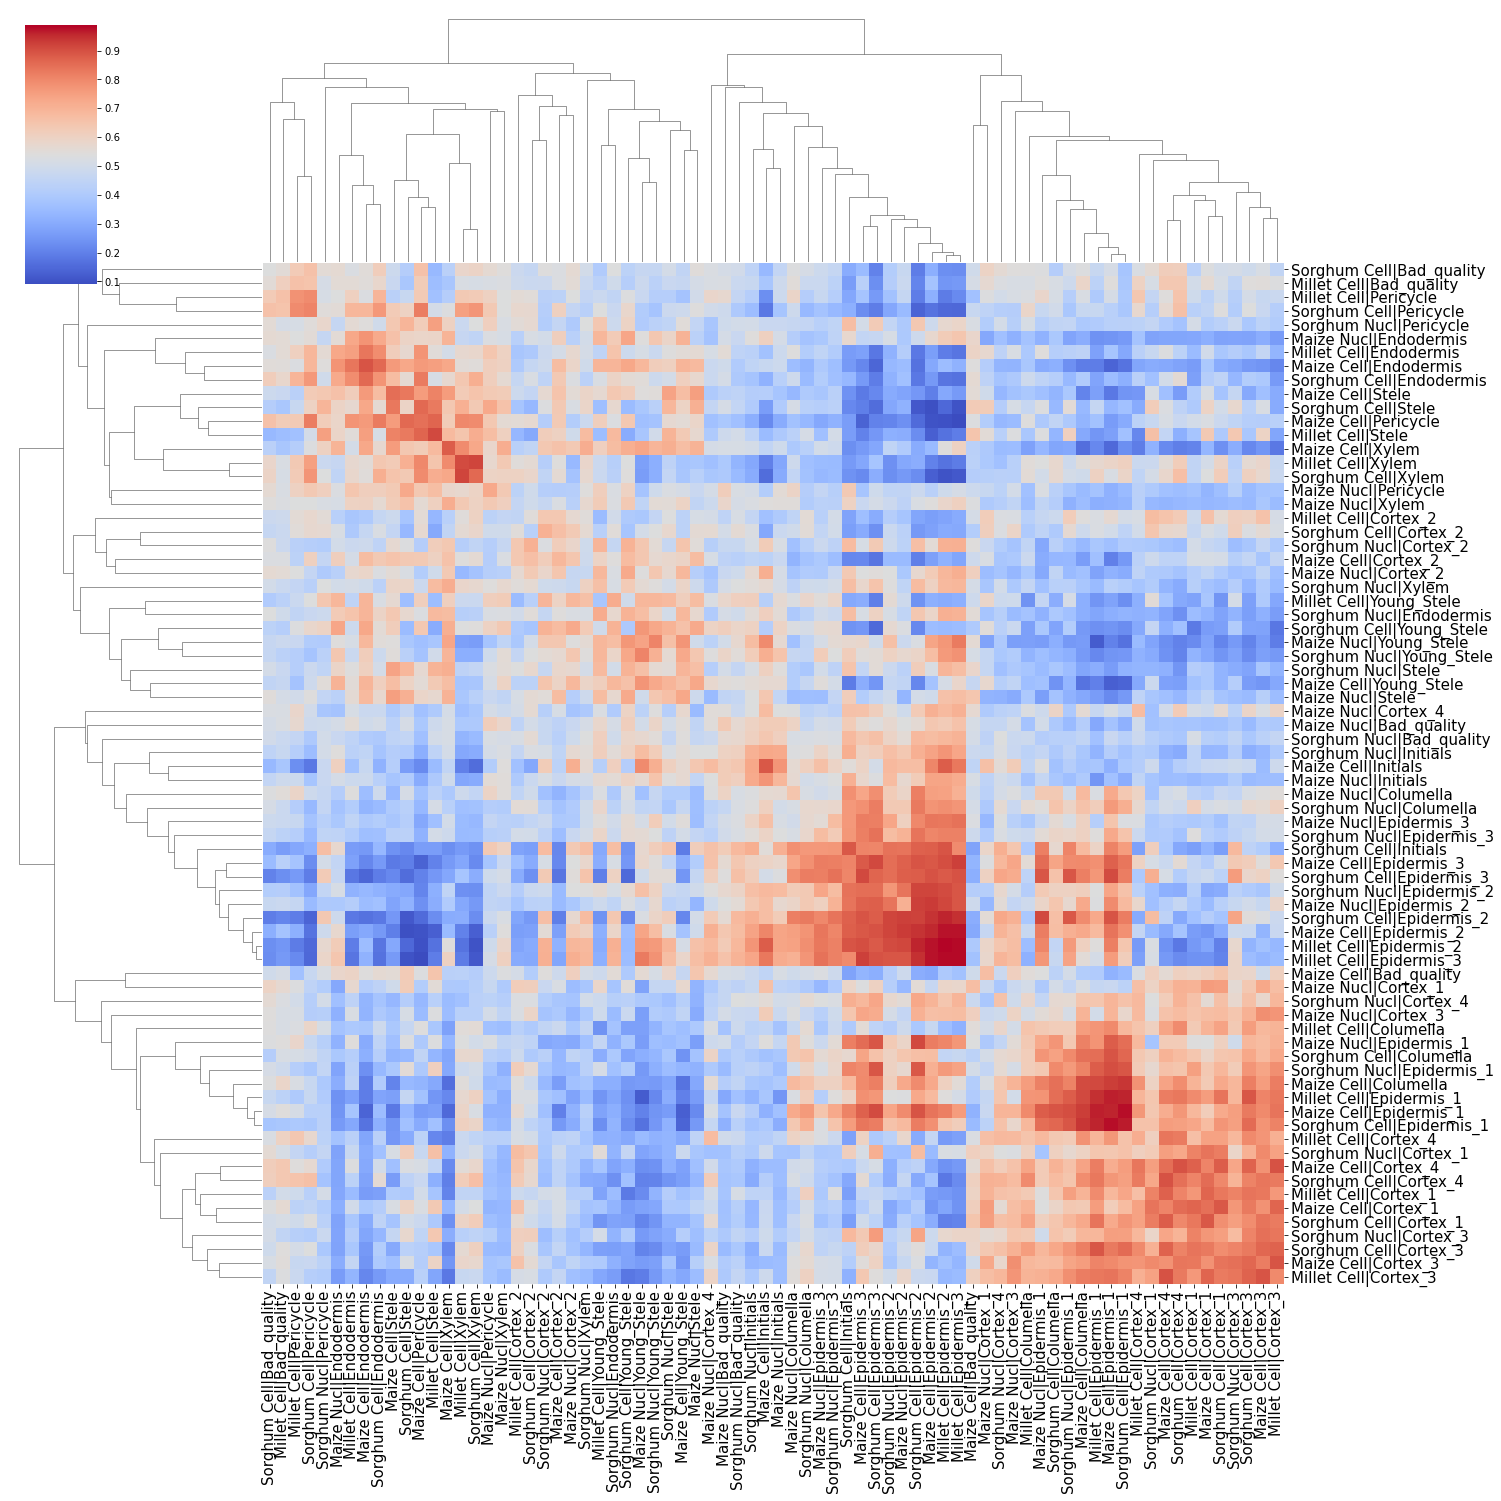

In [37]:
pymn.variableGenes(data_for_all_species_done_by_cell_and_species,study_col = 'Type and Species')
pymn.MetaNeighborUS(data_for_all_species_done_by_cell_and_species,study_col = 'Type and Species',ct_col = 'Cell Cluster Annotation')
g = pymn.plotMetaNeighborUS(data_for_all_species_done_by_cell_and_species,figsize = (20,20),cmap = 'coolwarm',fontsize = 15,show = False)
g.savefig('/home/passala/Gene_duplication_project/Code/Bruno_maize_sorghum_project/Figures/all_batch_correct_suggested_ben.jpg')

In [38]:
species_all_merged.var_names[20000]

'Zm00001d036963'

In [39]:
maize_annotations = get_go_annotations_as_panda('maize')


In [40]:
maize_annotations_subset = maize_annotations[maize_annotations.index.isin(species_all_merged.var_names)]
maize_annotations_subset

GO_term,GO:0000002,GO:0000003,GO:0000009,GO:0000012,GO:0000014,GO:0000015,GO:0000018,GO:0000019,GO:0000023,GO:0000025,...,GO:2001239,GO:2001240,GO:2001242,GO:2001243,GO:2001251,GO:2001252,GO:2001253,GO:2001289,GO:2001293,GO:2001294
NetworkIDs,,,,,,,,,,,,,,,,,,,,,
Zm00001d000001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zm00001d000002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zm00001d000004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zm00001d000011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zm00001d000012,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zm00001d054104,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zm00001d054105,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zm00001d054106,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:
maize_annotations['GO:0030312']

NetworkIDs
Zm00001d000001    0.0
Zm00001d000002    0.0
Zm00001d000004    0.0
Zm00001d000006    1.0
Zm00001d000008    1.0
                 ... 
Zm00001d054105    0.0
Zm00001d054106    0.0
Zm00001d054107    0.0
Zm00001d054110    0.0
Zm00001d054111    0.0
Name: GO:0030312, Length: 30395, dtype: float64

In [42]:
go_slim_plant_annotations = pd.read_csv('/data/passala/Generated_Tables/plant_go_slim_terms.csv')

In [43]:
go_slim_plant_annotations

,GO Term
0,GO:0065009
1,GO:0048856
2,GO:0042221
3,GO:0040029
4,GO:0040007
...,...
89,GO:0003700
90,GO:0003682
91,GO:0003677
92,GO:0003676


In [44]:
maize_annotations_go_slim_plants = maize_annotations_subset[maize_annotations_subset.columns.intersection(go_slim_plant_annotations['GO Term'].to_list())]
maize_annotations_go_slim_plants

GO_term,GO:0000003,GO:0000166,GO:0003676,GO:0003677,GO:0003682,GO:0003700,GO:0003723,GO:0003774,GO:0003824,GO:0004518,...,GO:0030234,GO:0030246,GO:0038023,GO:0040007,GO:0040029,GO:0042221,GO:0045182,GO:0048856,GO:0065009,GO:0140110
NetworkIDs,,,,,,,,,,,,,,,,,,,,,
Zm00001d000001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zm00001d000002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zm00001d000004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zm00001d000011,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zm00001d000012,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zm00001d054104,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zm00001d054105,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zm00001d054106,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [45]:
maize_annotations_subset.columns.isin(go_slim_plant_annotations['GO Term'].to_list())

array([False,  True, False, ..., False, False, False])

In [46]:
annotation_sizes = maize_annotations_go_slim_plants.sum()

In [47]:
annotation_sizes

GO_term
GO:0000003     417.0
GO:0000166    3272.0
GO:0003676    4083.0
GO:0003677    2295.0
GO:0003682     158.0
               ...  
GO:0042221    1294.0
GO:0045182     238.0
GO:0048856     570.0
GO:0065009     663.0
GO:0140110    1214.0
Length: 91, dtype: float64

In [48]:
maize_annotations_subset_by_size =maize_annotations_go_slim_plants.loc[:,(annotation_sizes>4) & (annotation_sizes < 1000)]
maize_annotations_subset_by_size

GO_term,GO:0000003,GO:0003682,GO:0003774,GO:0004518,GO:0005102,GO:0005198,GO:0005576,GO:0005618,GO:0005635,GO:0005654,...,GO:0019748,GO:0030154,GO:0030234,GO:0030246,GO:0038023,GO:0040007,GO:0040029,GO:0045182,GO:0048856,GO:0065009
NetworkIDs,,,,,,,,,,,,,,,,,,,,,
Zm00001d000001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zm00001d000002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
Zm00001d000004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zm00001d000011,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zm00001d000012,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zm00001d054104,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zm00001d054105,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zm00001d054106,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [49]:
supervised_metaneighbor_base.obs

,Cell Cluster Annotation,Species,Cluster and Type,Cluster and Species,Type,Type and Species
Sorghum_Cell_GTGAGCCCACAGGATG,Cortex_1,Sorghum,Cortex_1 Cell,Cortex_1 Cell Sorghum,Cell,Sorghum Cell
Sorghum_Cell_AAACGCTGTTGTGTTG,Cortex_1,Sorghum,Cortex_1 Cell,Cortex_1 Cell Sorghum,Cell,Sorghum Cell
Sorghum_Cell_AAACGCTTCATGAGAA,Cortex_1,Sorghum,Cortex_1 Cell,Cortex_1 Cell Sorghum,Cell,Sorghum Cell
Sorghum_Cell_AACAAAGCATTCTCTA,Cortex_1,Sorghum,Cortex_1 Cell,Cortex_1 Cell Sorghum,Cell,Sorghum Cell
Sorghum_Cell_AACCAACTCTTAGTTC,Cortex_1,Sorghum,Cortex_1 Cell,Cortex_1 Cell Sorghum,Cell,Sorghum Cell
...,...,...,...,...,...,...
Set_Cell_TTGCGTCCAGCCTGTG,Cortex_2,Millet,Cortex_2 Cell,Cortex_2 Cell Millet,Cell,Millet Cell
Set_Cell_TTTACTGGTCGCGAAA,Cortex_2,Millet,Cortex_2 Cell,Cortex_2 Cell Millet,Cell,Millet Cell
Set_Cell_TTTCCTCAGGCCGAAT,Cortex_2,Millet,Cortex_2 Cell,Cortex_2 Cell Millet,Cell,Millet Cell
Set_Cell_TTTCCTCTCGCCGTGA,Cortex_2,Millet,Cortex_2 Cell,Cortex_2 Cell Millet,Cell,Millet Cell


In [50]:
pymn.MetaNeighbor(adata = supervised_metaneighbor_base, study_col = 'Species', ct_col = 'Cell Cluster Annotation', genesets = maize_annotations_subset_by_size, fast_version = False, fast_hi_mem = True)
supervised_metaneighbor_base.uns['MetaNeighbor'].to_csv('/home/passala/Gene_duplication_project/Code/Whole_genome_comparison_code/Generated_tables_minor_use/plant_go_slim_metaneighbor_aurocs.csv')

/home/passala/miniconda3/envs/py39/lib/python3.9/site-packages/pyMetaNeighbor-0.1.0-py3.9.egg/pymn/MetaNeighbor.py:238: RuntimeWarning: invalid value encountered in true_divide
/home/passala/miniconda3/envs/py39/lib/python3.9/site-packages/numpy/lib/function_base.py:2642: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/passala/miniconda3/envs/py39/lib/python3.9/site-packages/numpy/lib/function_base.py:2643: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
